In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from tqdm._tqdm_notebook import tqdm_notebook
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.set_option("max_columns", 1000)

/kaggle/input/lish-moa/train_features.csv
/kaggle/input/lish-moa/test_features.csv
/kaggle/input/lish-moa/train_targets_nonscored.csv
/kaggle/input/lish-moa/sample_submission.csv
/kaggle/input/lish-moa/train_targets_scored.csv


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  


In [2]:
DIR = "/kaggle/input/lish-moa/"
train_feat = pd.read_csv(DIR+"train_features.csv")
test_feat = pd.read_csv(DIR+"test_features.csv")
train_nonscore = pd.read_csv(DIR+"train_targets_nonscored.csv")
train_score = pd.read_csv(DIR+"train_targets_scored.csv")
sub = pd.read_csv(DIR+"sample_submission.csv")

# overview

In [3]:
train_feat.shape

(23814, 876)

In [4]:
train_feat.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12  \
0 -0.1944 -1.0120 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574   
1  1.0190  0.5207  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958   
2 -0.0323  1.2390  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366   
3  4.0620 -0.8095 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511   
4  1.4180 -0.8244 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577   

     g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21  \
0 -0.4015  0.1789 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360   
1  0.4590  0.0803  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646   
2 -1.8300  0.6057 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181   
3 -0.5844 -2.5690  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580   
4  1.1750  0.2042  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685   

     g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30  \
0 -1.1880  0.6940  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934   
1 -0.2657 -0.3372  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499   
2 -1.5320  0.2307  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530   
3 -0.7191 -0.8004 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575   
4  0.7649  0.2057  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712   

     g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39  \
0 -0.5584 -0.0916 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.2162   
1 -0.2627  0.9959 -0.2483  0.2655 -0.2102  0.1656  0.5300 -0.2568 -0.0455   
2  0.6069  0.4290  0.1783  0.0018 -1.1800  0.1256 -0.1219  5.4470  1.0310   
3  0.0881 -2.7370  0.8745  0.5787 -1.6740 -1.6720 -1.2690  3.0900 -0.3814   
4  0.6389  0.6674 -0.0783  1.1740 -0.7110 -1.4470  1.0620  0.7888 -0.0848   

     g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48  \
0 -0.0347 -0.2566 -1.1980  0.3116 -1.0330  0.2208 -0.1143 -0.0251  0.0350   
1  0.1194 -0.3958 -1.1730  0.4509  1.9250  1.1010  0.2648 -0.3615  0.1710   
2  0.3477 -0.5561  0.0357 -0.3636 -0.4653 -0.8346  0.1113 -0.7615 -0.4983   
3 -0.7229 -0.0010  0.1353 -1.6400 -0.7483 -1.0820 -0.1521  0.0747 -0.4851   
4  0.1302  0.1224  0.9584  0.2126  0.6162  1.1570  1.1140 -0.9416 -0.3780   

     g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57  \
0  0.4233 -0.1221 -0.4927  0.6119  0.4715 -0.0351 -0.1605 -0.6750  0.2263   
1 -0.8900  1.2730 -0.5036 -0.2277 -0.7339 -0.4283 -0.1231 -0.6328  0.4759   
2  0.4552 -0.0978 -0.2661  0.6058  0.2686 -0.6191 -0.4444  1.2540  0.0621   
3  0.6636 -2.8230 -0.6035 -1.3550  2.0200 -0.5301 -1.3240 -0.5936  0.4331   
4 -0.8147 -0.0803 -0.3818  0.6877  0.0000  0.1776  1.1320 -0.1180  1.2130   

     g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66  \
0  0.5790  0.9588  0.6061 -0.1300  0.6611 -0.3136 -0.2020  0.0251  0.1670   
1  0.3249 -0.7408 -0.5814  1.7840 -0.1087  1.0350  0.4087 -0.6948 -0.8026   
2 -0.1757 -1.4370  0.5553  0.8346 -0.3334 -0.2933 -0.1644 -1.1280 -0.0292   
3  0.0899 -1.5240  0.3936  1.4630 -1.2100 -1.2340 -1.0300  0.7977  0.2314   
4  0.7709  0.6745  0.7871  1.6410  0.1806  1.3480  1.1070  0.5392  0.0000   

     g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75  \
0 -0.4195  0.6551 -0.7395 -0.7047 -0.5369  0.0314 -0.5239 -0.3406 -0.6332   
1  0.0954 -0.4054  0.1197  0.1956  0.0720 -0.2463 -0.1084  0.4008 -0.5857   
2  0.0939  0.5916  0.6809  0.7821  0.6801  0.9634  0.4057 -0.0708 -1.3570   
3  

In [5]:
train_score.shape

(23814, 207)

In [6]:
train_score.head()

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  adrenergic_receptor_agonist  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   adrenergic_receptor_antagonist  akt_inhibitor  \
0                               0              0   
1                               0              0   
2                               0              0   
3                               0              0   
4                               0              0   

   aldehyde_dehydrogenase_inhibitor  alk_inhibitor  ampk_activator  analgesic  \
0                                 0              0               0          0   
1                                 0              0               0          0   
2                                 0              0               0          0   
3                                 0              0               0          0   
4                                 0              0               0          0   

   androgen_receptor_agonist  androgen_receptor_antagonist  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   anesthetic_-_local  angiogenesis_inhibitor  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   

   angiotensin_receptor_antagonist  anti-inflammatory  antiarrhythmic  \
0                                0                  0               0   
1                                0                  0               0   
2                                0                  0               0   
3                                0                  0               0   
4                                0                  0               0   

   antibiotic  anticonvulsant  antifungal  antihistamine  antimalarial  \
0           0               0           0              0             0   
1          

In [7]:
set(train_feat.sig_id.unique()) == set(train_score.sig_id.unique())

True

In [8]:
test_feat.shape

(3982, 876)

In [9]:
test_feat.head()

sig_id      cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_0004d9e33       trt_cp       24      D1 -0.5458  0.1306 -0.5135  0.4408   
1  id_001897cda       trt_cp       72      D1 -0.1829  0.2320  1.2080 -0.4522   
2  id_002429b5b  ctl_vehicle       24      D1  0.1852 -0.1404 -0.3911  0.1310   
3  id_00276f245       trt_cp       24      D2  0.4828  0.1955  0.3825  0.4244   
4  id_0027f1083       trt_cp       48      D1 -0.3979 -1.2680  1.9130  0.2057   

      g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12  \
0  1.5500 -0.1644 -0.2140  0.2221 -0.3260  1.9390 -0.2305 -0.3670  1.3040   
1 -0.3652 -0.3319 -1.8820  0.4022 -0.3528  0.1271  0.9303  0.3173 -1.0120   
2 -1.4380  0.2455 -0.3390 -0.3206  0.6944  0.5837 -0.0553 -0.6222  2.5430   
3 -0.5855 -1.2020  0.5998 -0.1799  0.9365  0.2942  1.3990 -1.1080  1.1610   
4 -0.5864 -0.0166  0.5128  0.6365  0.2611 -1.1120 -0.1747 -0.2053 -0.0006   

     g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21  \
0  1.4610  0.0043  0.6816 -0.2304 -0.0635 -0.2030 -0.6821 -0.6242  0.1297   
1 -0.3213  0.0607 -0.5389 -0.8030 -1.0600 -0.0978 -0.8156 -0.6514  0.6812   
2 -0.7857  0.8163 -0.0495  0.1806  1.0290 -0.5204 -1.1070  0.7365 -0.3835   
3 -0.8134  0.0743 -0.3096 -0.9956  1.7100  1.2200 -0.1258 -0.5900 -0.7956   
4  0.0254  0.1784 -0.1314  1.0700  0.0477 -0.0756  0.1287  0.1403  0.7609   

     g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30  \
0 -0.0338  0.3372  0.2254  0.4795  0.7642  0.6638 -0.2480 -0.1183 -0.4847   
1  0.5246  0.0000  0.5030 -0.1500 -0.1433  2.0910 -0.6556 -0.6012 -0.4104   
2 -0.5771  0.0523 -0.2690  0.1674  0.6010 -0.6660  0.0276  0.0924  0.2785   
3 -0.6765  0.0000 -0.8820  0.7609 -0.0882  0.5217  0.9587 -0.4764  0.2690   
4 -0.1095  0.0000 -1.0950 -0.0780  0.9048 -0.3007  0.4351 -0.1558  0.2101   

     g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39  \
0 -0.0179 -0.8204 -0.5296 -1.5070 -0.0144  0.4448  0.5753 -0.2993 -0.9532   
1 -0.0580 -0.3608  0.2197 -0.7101  1.3430 -0.9605 -1.1920  0.3733  0.0216   
2 -0.3943 -0.4602 -0.0673 -1.3420  0.3127  0.3317  0.5176 -1.0830 -0.7108   
3  0.4753  0.0196  0.2775 -0.7142  0.7079  0.4006 -0.0175  0.5904 -0.1295   
4  0.4850  0.1139  0.6745 -0.9101 -0.6690  1.6320 -0.0910 -0.2841 -0.0883   

     g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48  \
0 -0.1443 -1.0880  0.2080  0.5670  1.1190 -0.0455  0.2789 -1.0230 -0.6231   
1 -0.1787 -0.4277  1.2110  0.1401 -1.0940  0.7750  0.0000  2.3690 -0.1453   
2  0.8037 -0.1761 -0.5053 -0.1759 -0.1807 -0.2681  0.0284  0.9756 -0.5911   
3 -0.1021 -0.0480 -0.7627 -0.3995  0.2503 -1.9450  0.3880  0.1098  0.3617   
4  1.7570  2.0050 -0.8237  0.3234  0.2379 -1.4110 -0.1383  0.0630  0.2198   

     g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57  \
0 -0.6682 -0.0718 -1.5240  0.9117  0.6883 -0.1073 -0.1134  0.4536  5.5140   
1 -1.0800 -1.1160 -0.1209  0.0668 -0.8654 -1.0150  0.5382  1.3060  0.2869   
2 -0.4490  1.7970 -0.1644 -0.6560 -0.1700 -0.1906  1.0820  0.3192  0.9073   
3 -0.3092  0.6467  0.0491 -0.3468  0.4760 -0.3444 -0.2431  1.0410  0.3487   
4 -0.5721  0.1917 -0.3863  0.1559  0.1903  0.4977  0.7420  1.1110  0.4917   

     g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66  \
0  0.3271  0.1388 -0.2321  1.5170  0.0546  0.9043 -0.3088  1.5360  0.1511   
1 -0.8135  0.4051  1.2760 -0.6459  0.5404 -0.1757 -0.0274  0.7104  0.8514   
2  0.4009  0.5121 -0.9755  0.1493 -0.0588 -0.5628 -0.0579 -1.0700 -0.3147   
3  0.9301 -0.3713 -0.4061 -0.5070  0.9324 -0.2296 -0.6001 -1.7580 -0.7311   
4 -0.0232  0.2063 -0.7254  0.5947  0.3108  0.6921  1.0250 -0.8283 -0.5511   

     g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75  \
0 -0.3711 -0.0195 -0.4992  1.2080 -0.3614  0.7978  0.3076  0.5958  0.4006   
1  0.9873  0.7911 -0.3199  0.8688 -1.2900 -0.8000  0.6292 -1.2300 -0.2149   
2  0.2278 -0.9174  0.6609  1.0980  0.4891  0.6094 

In [10]:
set(test_feat.columns) == set(train_feat.columns)

True

In [11]:
train_feat.describe()

cp_time           g-0           g-1           g-2           g-3  \
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000   
mean      48.020156      0.248366     -0.095684      0.152253      0.081971   
std       19.402807      1.393399      0.812363      1.035731      0.950012   
min       24.000000     -5.513000     -5.737000     -9.104000     -5.998000   
25%       24.000000     -0.473075     -0.562200     -0.437750     -0.429575   
50%       48.000000     -0.008850     -0.046600      0.075200      0.008050   
75%       72.000000      0.525700      0.403075      0.663925      0.463400   
max       72.000000     10.000000      5.039000      8.257000     10.000000   

                g-4           g-5           g-6           g-7           g-8  \
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000   
mean       0.057347     -0.138836      0.035961     -0.202651     -0.190083   
std        1.032091      1.179388      0.882395      1.125494      1.749885   
min       -6.369000    -10.000000    -10.000000    -10.000000    -10.000000   
25%       -0.470925     -0.602225     -0.493900     -0.525175     -0.511675   
50%       -0.026900     -0.015650     -0.000650     -0.017900      0.010000   
75%        0.465375      0.510425      0.528725      0.411900      0.549225   
max       10.000000      7.282000      7.333000      5.473000      8.887000   

                g-9          g-10          g-11          g-12          g-13  \
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000   
mean       0.119905     -0.123321      0.182307      0.143203      0.209402   
std        1.087180      1.291501      1.253604      1.234590      1.273068   
min       -8.337000    -10.000000     -5.870000     -8.587000     -5.018000   
25%       -0.360200     -0.511475     -0.489675     -0.447500     -0.481200   
50%        0.160450      0.038550      0.013800      0.060250      0.009800   
75%        0.697775      0.525400      0.575275      0.604450      0.575825   
max        6.433000     10.000000     10.000000     10.000000     10.000000   

               g-14          g-15          g-16          g-17          g-18  \
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000   
mean      -0.173884     -0.024432      0.126823     -0.146663      0.087687   
std        1.247178      0.659839      1.418997      1.179688      0.743301   
min      -10.000000    -10.000000    -10.000000    -10.000000     -4.226000   
25%       -0.607975     -0.404150     -0.391950     -0.513775     -0.272200   
50%       -0.030100      0.000000      0.149400     -0.002200      0.000000   
75%        0.457975      0.382475      0.829500      0.494775      0.327800   
max       10.000000      4.134000      6.418000      4.750000      8.872000   

               g-19          g-20          g-21          g-22          g-23  \
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000   
mean      -0.082982     -0.111908     -0.087379      0.047548     -0.117474   
std        0.844796      1.219529      0.824401      0.924838      0.760159   
min      -10.000000    -10.000000     -5.700000    -10.000000    -10.000000   
25%       -0.488675     -0.524600     -0.538900     -0.440375     -0.508900   
50%       -0.027800     -0.002800     -0.069350     -0.011800      0.000000   
75%        0.400600      0.492400      0.414875      0.433400      0.329250   
max        4.081000      9.842000      5.248000      5.942000      5.201000   

               g-24          g-25          g-26          g-27          g-28  \
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000   
mean      -0.113212     -0.052746     -0.091055      0.112176     -0.046458   
std        1.203186      0.866977      1.103765      1.001687      1.027758   
min      -10.000000     -8.272000     -8.184000     -4.835000     -7.913000   
25%       -0.533900     -0.497700     -0.512875     -0.46

In [12]:
test_feat.describe()

cp_time          g-0          g-1          g-2          g-3  \
count  3982.000000  3982.000000  3982.000000  3982.000000  3982.000000   
mean     48.030136     0.197471    -0.063233     0.137516     0.049622   
std      19.414155     1.373476     0.800573     1.066475     0.949972   
min      24.000000    -5.321000    -4.142000    -6.996000    -3.765000   
25%      24.000000    -0.502725    -0.552975    -0.431800    -0.465350   
50%      48.000000    -0.060700    -0.027500     0.073400    -0.036450   
75%      72.000000     0.454650     0.429950     0.641125     0.423150   
max      72.000000    10.000000     4.536000     8.227000    10.000000   

               g-4          g-5          g-6          g-7          g-8  \
count  3982.000000  3982.000000  3982.000000  3982.000000  3982.000000   
mean      0.052434    -0.147852     0.010424    -0.166886    -0.168069   
std       0.994018     1.204934     0.859452     1.088335     1.666240   
min      -6.312000    -8.717000    -6.037000    -8.833000   -10.000000   
25%      -0.445750    -0.576000    -0.521325    -0.477400    -0.526925   
50%      -0.047800    -0.012500    -0.009200     0.002150    -0.002900   
75%       0.436050     0.498950     0.495975     0.422500     0.518050   
max       7.615000     6.356000     6.190000     2.995000     8.007000   

               g-9         g-10         g-11         g-12         g-13  \
count  3982.000000  3982.000000  3982.000000  3982.000000  3982.000000   
mean      0.143817    -0.113645     0.156127     0.125307     0.209406   
std       1.079793     1.301133     1.219051     1.196550     1.291285   
min      -7.799000    -9.283000    -7.908000    -6.223000    -3.784000   
25%      -0.323875    -0.481425    -0.500775    -0.454475    -0.493675   
50%       0.163850     0.052550    -0.022700     0.061550     0.001900   
75%       0.728550     0.517725     0.552350     0.595850     0.558825   
max       5.348000     5.187000     8.320000     9.844000    10.000000   

              g-14         g-15         g-16         g-17         g-18  \
count  3982.000000  3982.000000  3982.000000  3982.000000  3982.000000   
mean     -0.162724    -0.021127     0.111658    -0.147687     0.068170   
std       1.154268     0.639082     1.389288     1.116907     0.711439   
min      -9.817000    -3.995000   -10.000000    -9.082000    -2.599000   
25%      -0.602000    -0.402000    -0.409875    -0.517650    -0.273800   
50%      -0.027700     0.000000     0.133550    -0.019150     0.000000   
75%       0.441450     0.389625     0.812050     0.448800     0.312225   
max       8.541000     2.872000     5.624000     3.600000     7.788000   

              g-19         g-20         g-21         g-22         g-23  \
count  3982.000000  3982.000000  3982.000000  3982.000000  3982.000000   
mean     -0.097587    -0.115368    -0.095966    -0.015484    -0.110780   
std       0.811698     1.169031     0.812146     0.907731     0.755585   
min      -7.064000   -10.000000    -5.604000    -6.978000    -4.392000   
25%      -0.492850    -0.526550    -0.543300    -0.468800    -0.508400   
50%      -0.036000     0.022350    -0.078800    -0.044150     0.000000   
75%       0.386925     0.478800     0.377575     0.394575     0.324775   
max       3.657000     6.833000     3.542000     4.697000     5.161000   

             g-24         g-25         g-26         g-27         g-28  \
count  3982.00000  3982.000000  3982.000000  3982.000000  3982.000000   
mean     -0.09969    -0.056584    -0.056259     0.138864    -0.052980   
std       1.20038     0.859556     1.095509     1.037833     1.053625   
min     -10.00000    -5.668000    -7.188000    -4.291000    -6.756000   
25%      -0.53705    -0.501200    -0.498225    -0.453025    -0.373200   
50%       0.02250    -0.016300     0.032800     0.050450     0.023700   
75%       0.52720     0.437325     0.543400     0.587725     0.429525   
max       7.37400     5.422000    10.000000    10.000000     6.089000   

              g-29

In [13]:
sub.head()

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_0004d9e33                          0.5                     0.5   
1  id_001897cda                          0.5                     0.5   
2  id_002429b5b                          0.5                     0.5   
3  id_00276f245                          0.5                     0.5   
4  id_0027f1083                          0.5                     0.5   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0             0.5                             0.5   
1             0.5                             0.5   
2             0.5                             0.5   
3             0.5                             0.5   
4             0.5                             0.5   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                0.5                             0.5   
1                                0.5                             0.5   
2                                0.5                             0.5   
3                                0.5                             0.5   
4                                0.5                             0.5   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                         0.5                            0.5   
1                         0.5                            0.5   
2                         0.5                            0.5   
3                         0.5                            0.5   
4                         0.5                            0.5   

   adenylyl_cyclase_activator  adrenergic_receptor_agonist  \
0                         0.5                          0.5   
1                         0.5                          0.5   
2                         0.5                          0.5   
3                         0.5                          0.5   
4                         0.5                          0.5   

   adrenergic_receptor_antagonist  akt_inhibitor  \
0                             0.5            0.5   
1                             0.5            0.5   
2                             0.5            0.5   
3                             0.5            0.5   
4                             0.5            0.5   

   aldehyde_dehydrogenase_inhibitor  alk_inhibitor  ampk_activator  analgesic  \
0                               0.5            0.5             0.5        0.5   
1                               0.5            0.5             0.5        0.5   
2                               0.5            0.5             0.5        0.5   
3                               0.5            0.5             0.5        0.5   
4                               0.5            0.5             0.5        0.5   

   androgen_receptor_agonist  androgen_receptor_antagonist  \
0                        0.5                           0.5   
1                        0.5                           0.5   
2                        0.5                           0.5   
3                        0.5                           0.5   
4                        0.5                           0.5   

   anesthetic_-_local  angiogenesis_inhibitor  \
0                 0.5                     0.5   
1                 0.5                     0.5   
2                 0.5                     0.5   
3                 0.5                     0.5   
4                 0.5                     0.5   

   angiotensin_receptor_antagonist  anti-inflammatory  antiarrhythmic  \
0                              0.5                0.5             0.5   
1                              0.5                0.5             0.5   
2                              0.5                0.5             0.5   
3                              0.5                0.5             0.5   
4                              0.5                0.5             0.5   

   antibiotic  anticonvulsant  antifungal  antihistamine  antimalarial  \
0         0.5             0.5         0.5            0.5           0.5   
1         0

In [14]:
# missing values
print(train_feat.isnull().sum().sum())
print(test_feat.isnull().sum().sum())
print(train_score.isnull().sum().sum())
print(train_nonscore.isnull().sum().sum())

0
0
0
0


# cp variables

In [15]:
cp_feats = [i for i in train_feat.columns if "cp_" in i]
print(cp_feats)

['cp_type', 'cp_time', 'cp_dose']


In [16]:
# cp_type: indicates samples treated with a compound (cp_vehicle) or with a control perturbation (ctrl_vehicle); control perturbations have no MoAs
print(train_feat["cp_type"].value_counts())
print(train_feat["cp_type"].value_counts(normalize=True))
print("##########################")
print(test_feat["cp_type"].value_counts())
print(test_feat["cp_type"].value_counts(normalize=True))

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64
trt_cp         0.921643
ctl_vehicle    0.078357
Name: cp_type, dtype: float64
##########################
trt_cp         3624
ctl_vehicle     358
Name: cp_type, dtype: int64
trt_cp         0.910095
ctl_vehicle    0.089905
Name: cp_type, dtype: float64


[24 72 48]
[24 72 48]


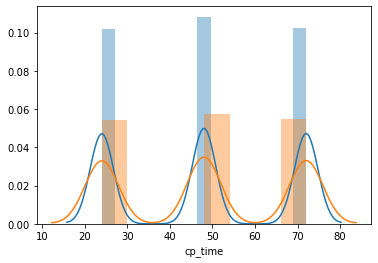

In [17]:
# cp_time: treatment duration
print(train_feat["cp_time"].unique())
print(test_feat["cp_time"].unique())
sns.distplot(train_feat["cp_time"])
sns.distplot(test_feat["cp_time"])

In [18]:
# cp_dose: dose (high or low)
print(train_feat["cp_dose"].value_counts())
print(train_feat["cp_dose"].value_counts(normalize=True))
print("#############")
print(test_feat["cp_dose"].value_counts())
print(test_feat["cp_dose"].value_counts(normalize=True))

D1    12147
D2    11667
Name: cp_dose, dtype: int64
D1    0.510078
D2    0.489922
Name: cp_dose, dtype: float64
#############
D1    2027
D2    1955
Name: cp_dose, dtype: int64
D1    0.509041
D2    0.490959
Name: cp_dose, dtype: float64


In [19]:
#correlations = train_feat[cp_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
#correlations = correlations[correlations['level_0'] != correlations['level_1']]
#correlations

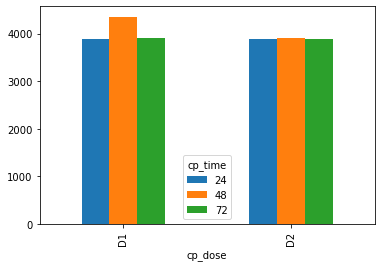

In [20]:
# interaction between cp variables 
pd.crosstab(train_feat["cp_dose"], train_feat["cp_time"]).plot(kind="bar")

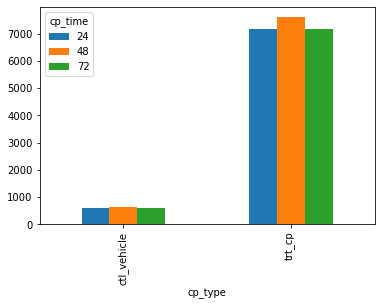

In [21]:
pd.crosstab(train_feat["cp_type"], train_feat["cp_time"]).plot(kind="bar")

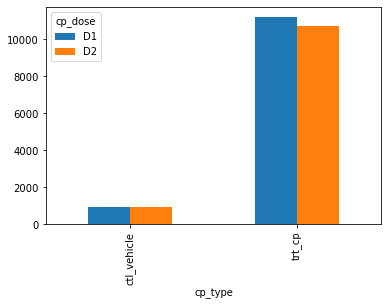

In [22]:
pd.crosstab(train_feat["cp_type"], train_feat["cp_dose"]).plot(kind="bar")

# g variables

In [23]:
# clear colleration in g variables
g_feats = [i for i in train_feat.columns if "g-" in i]
correlations = train_feat[g_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(10)

level_0 level_1         0
595202   g-460   g-349  0.836859
595203   g-349   g-460  0.836859
595204   g-489    g-50  0.840404
595205    g-50   g-489  0.840404
595206    g-37   g-489  0.842525
595207   g-489    g-37  0.842525
595208    g-50   g-672  0.845668
595209   g-672    g-50  0.845668
595210    g-37    g-50  0.907061
595211    g-50    g-37  0.907061

In [24]:
correlations.head(10)

level_0 level_1             0
0    g-44   g-179  1.997950e-09
1   g-179    g-44  1.997950e-09
2   g-267   g-751  5.663806e-07
3   g-751   g-267  5.663806e-07
4   g-604   g-295  7.024581e-07
5   g-295   g-604  7.024581e-07
6   g-151   g-463  7.287338e-07
7   g-463   g-151  7.287338e-07
8   g-621   g-475  2.264722e-06
9   g-475   g-621  2.264722e-06

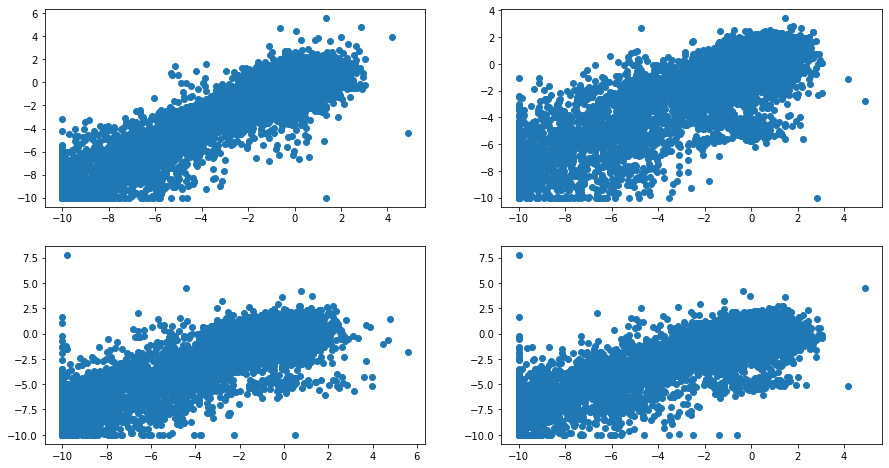

In [25]:
# some correlated examples
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(train_feat["g-50"], train_feat["g-37"])
plt.subplot(2,2,2)
plt.scatter(train_feat["g-50"], train_feat["g-672"])
plt.subplot(2,2,3)
plt.scatter(train_feat["g-37"], train_feat["g-489"])
plt.subplot(2,2,4)
plt.scatter(train_feat["g-50"], train_feat["g-489"])

In [26]:
#print(len(g_feats))
#pca = PCA(n_components=370)
#pca.fit(train_feat[g_feats])
#print(np.sum(np.array(pca.explained_variance_ratio_)))

#mod_g_feats = pca.fit_transform(train_feat[g_feats])

#tsne = TSNE(random_state=0, metric="cosine")
#embs = tsne.fit_transform(mod_g_feats)
#plt.plot(embs[:,0], embs[:,1])

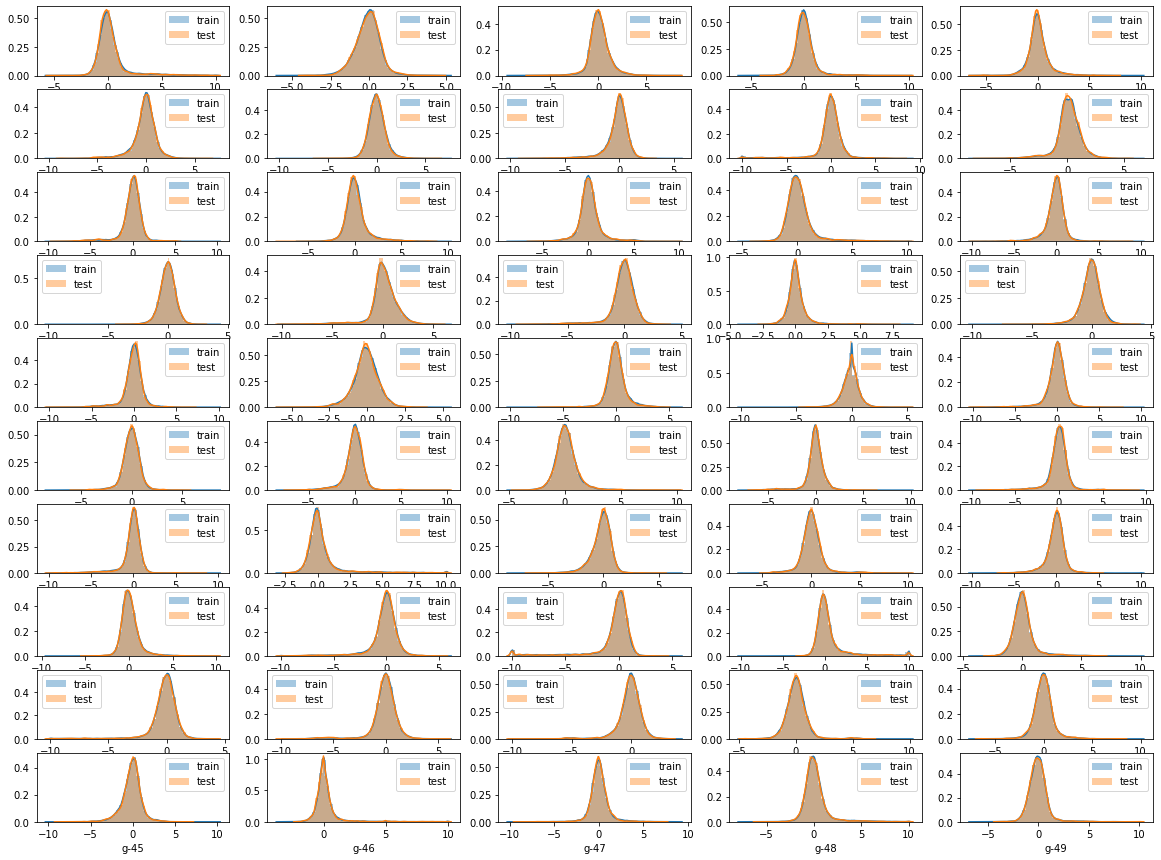

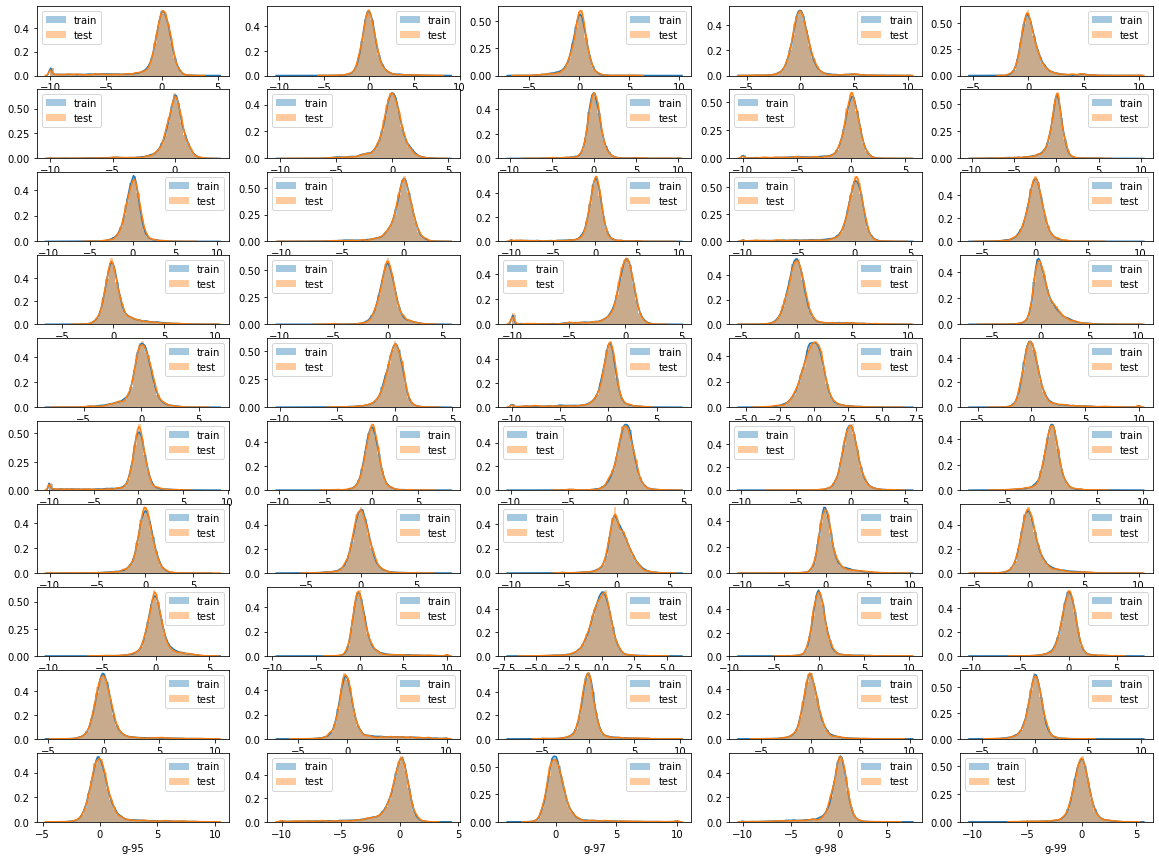

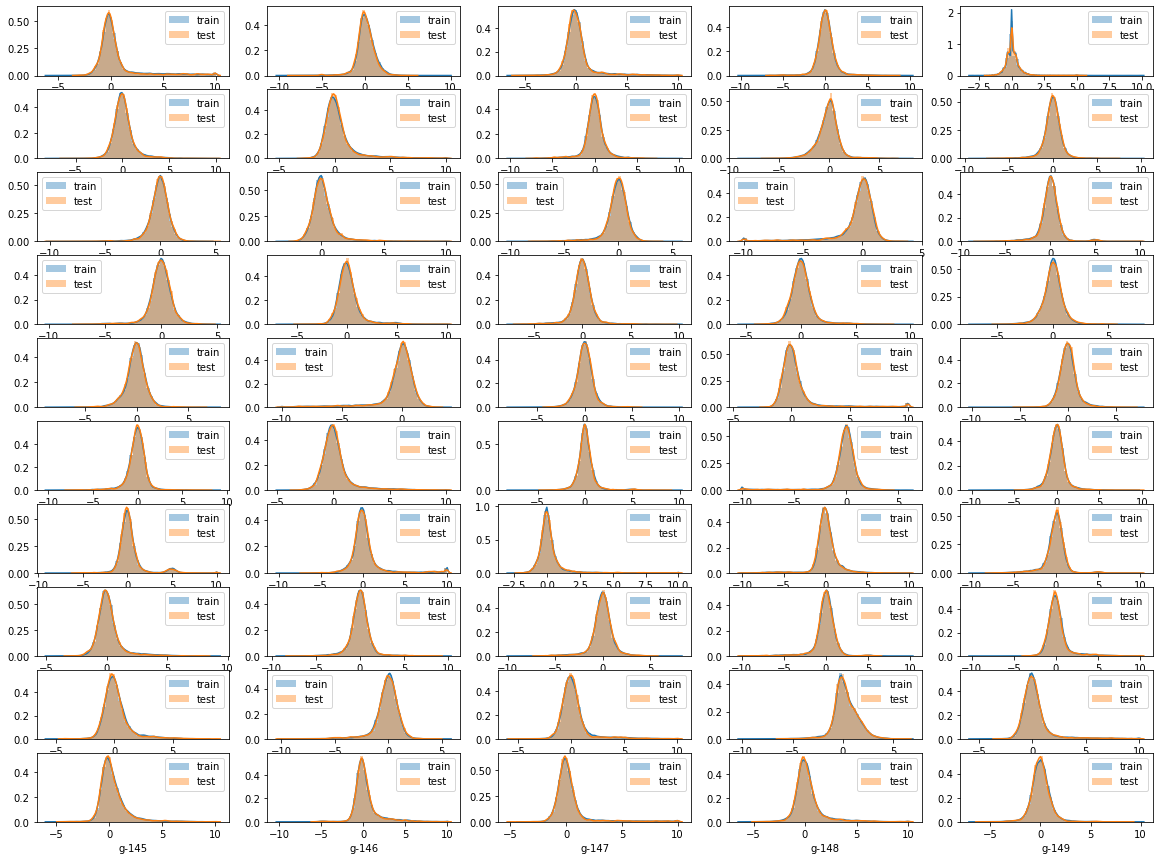

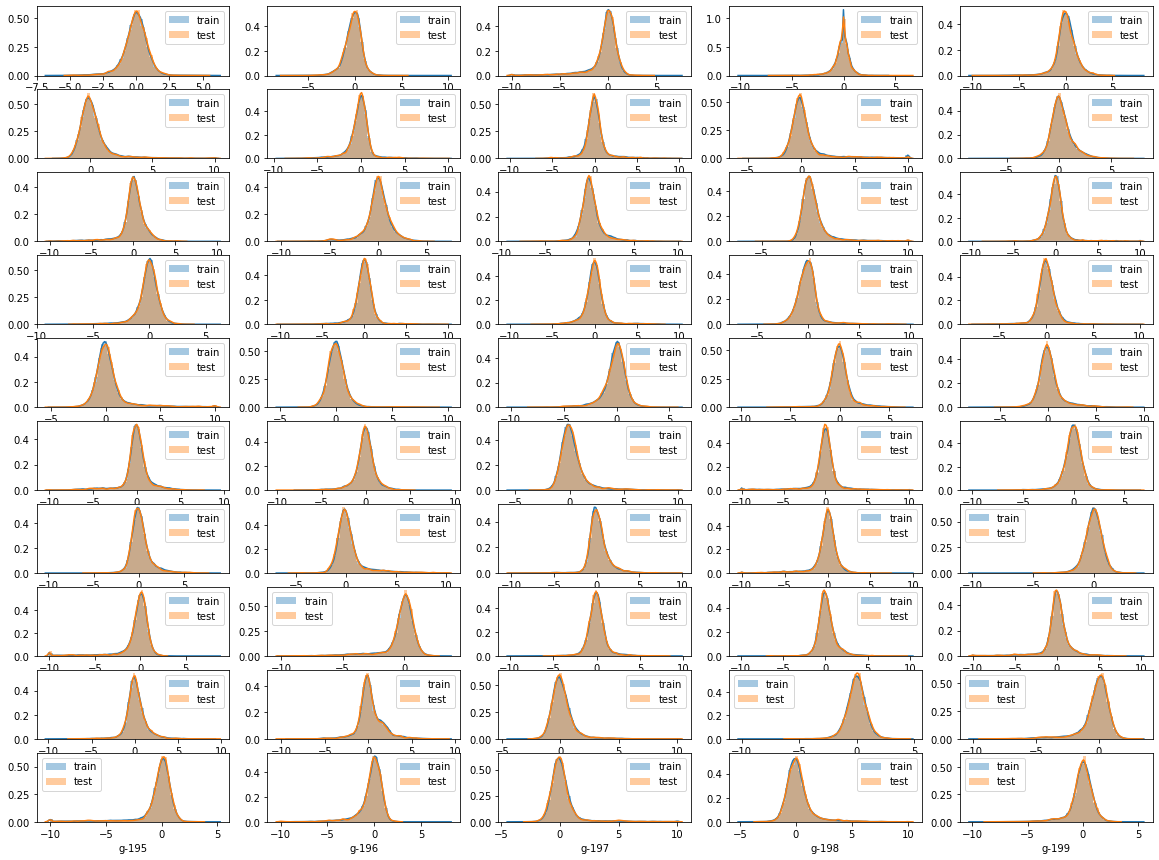

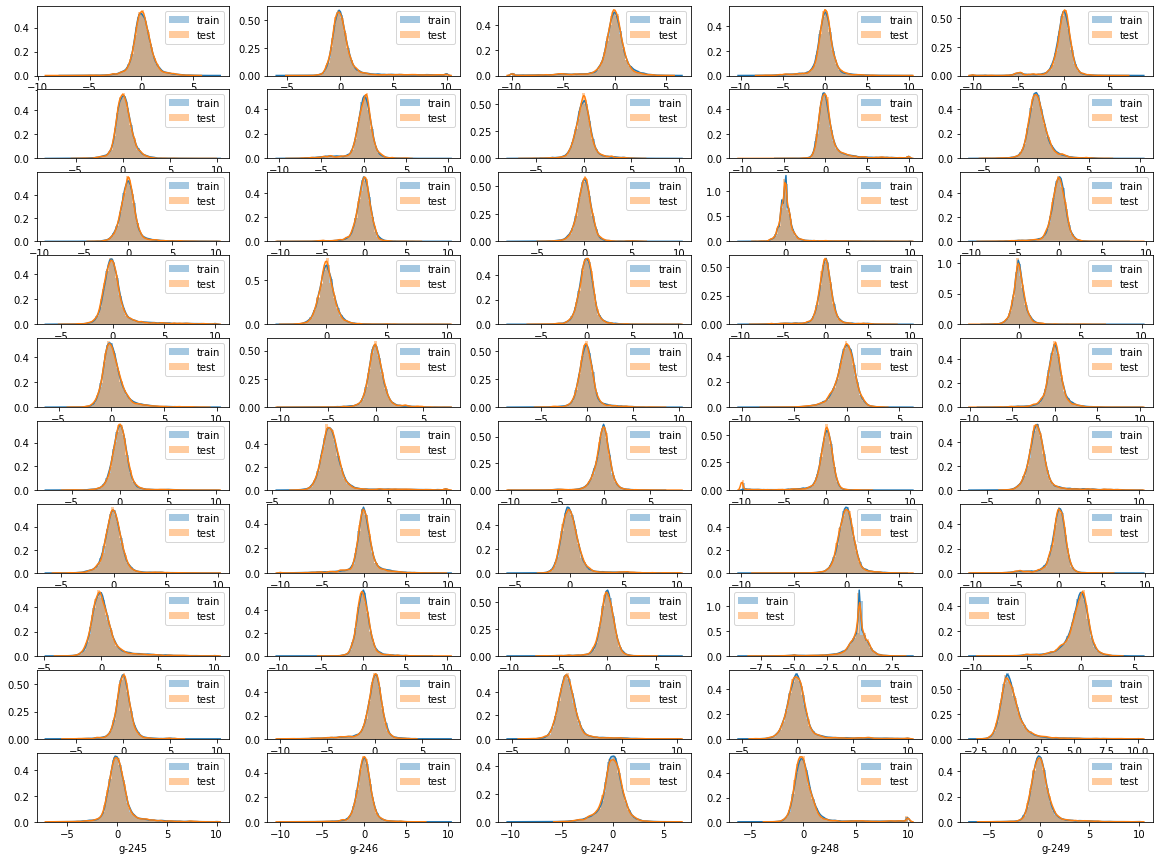

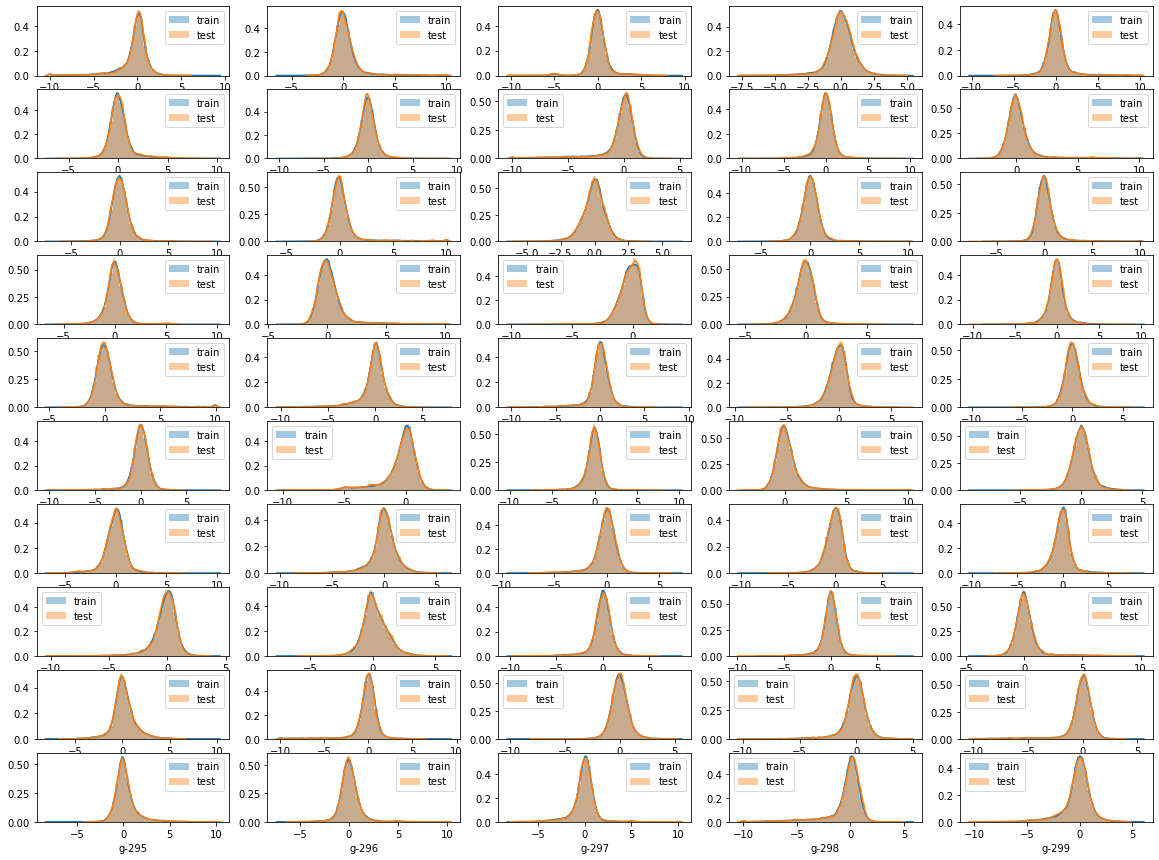

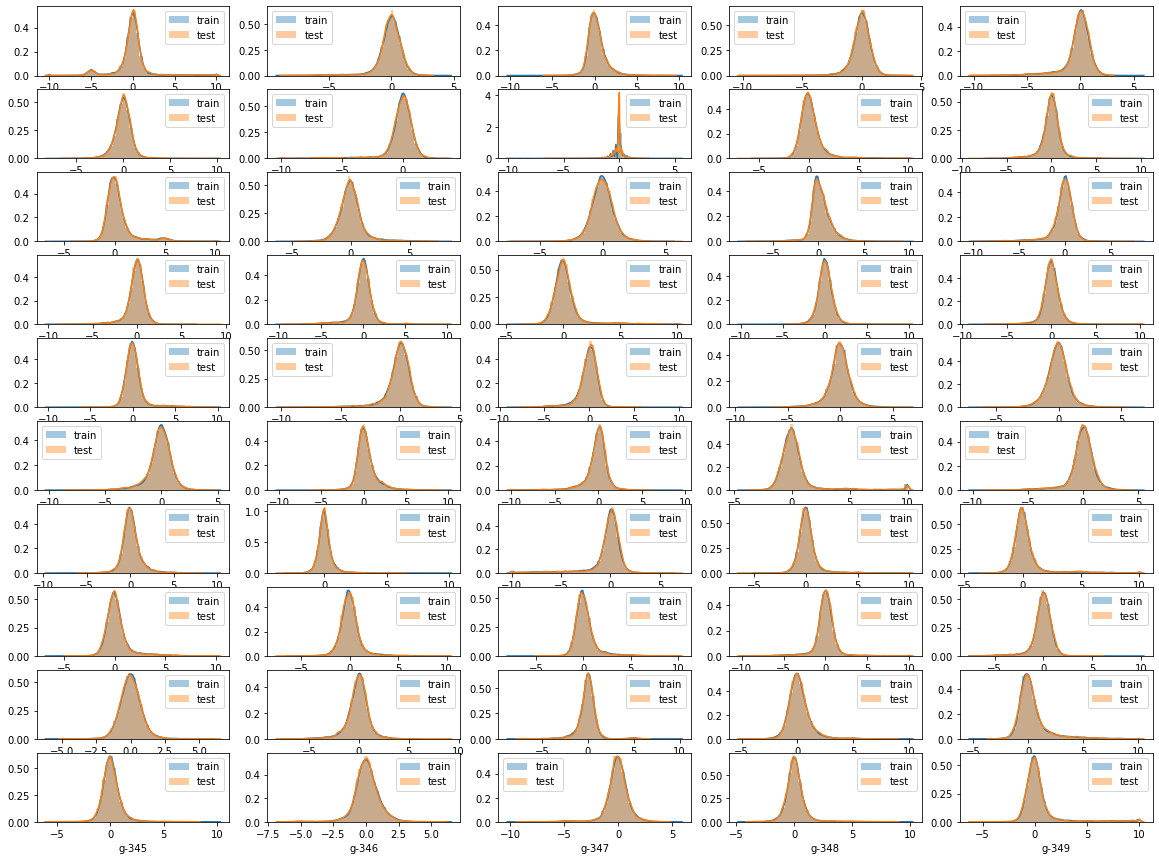

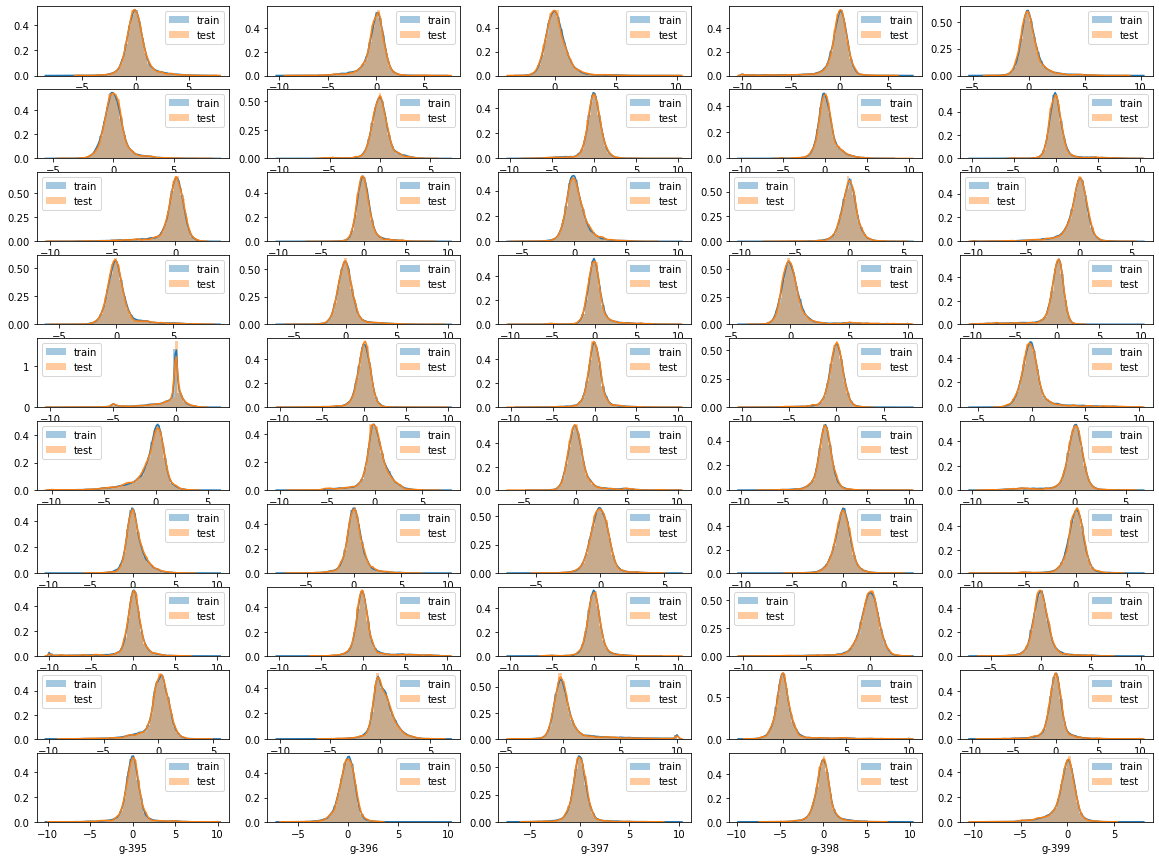

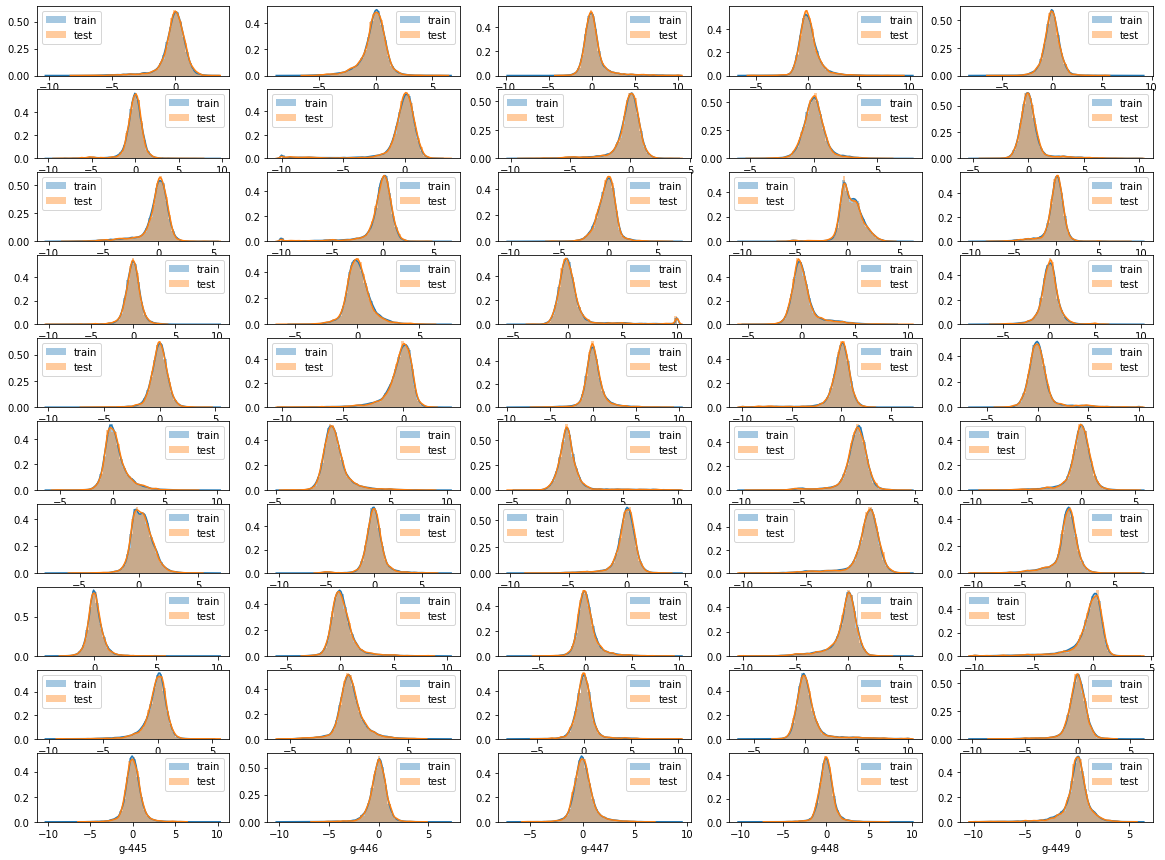

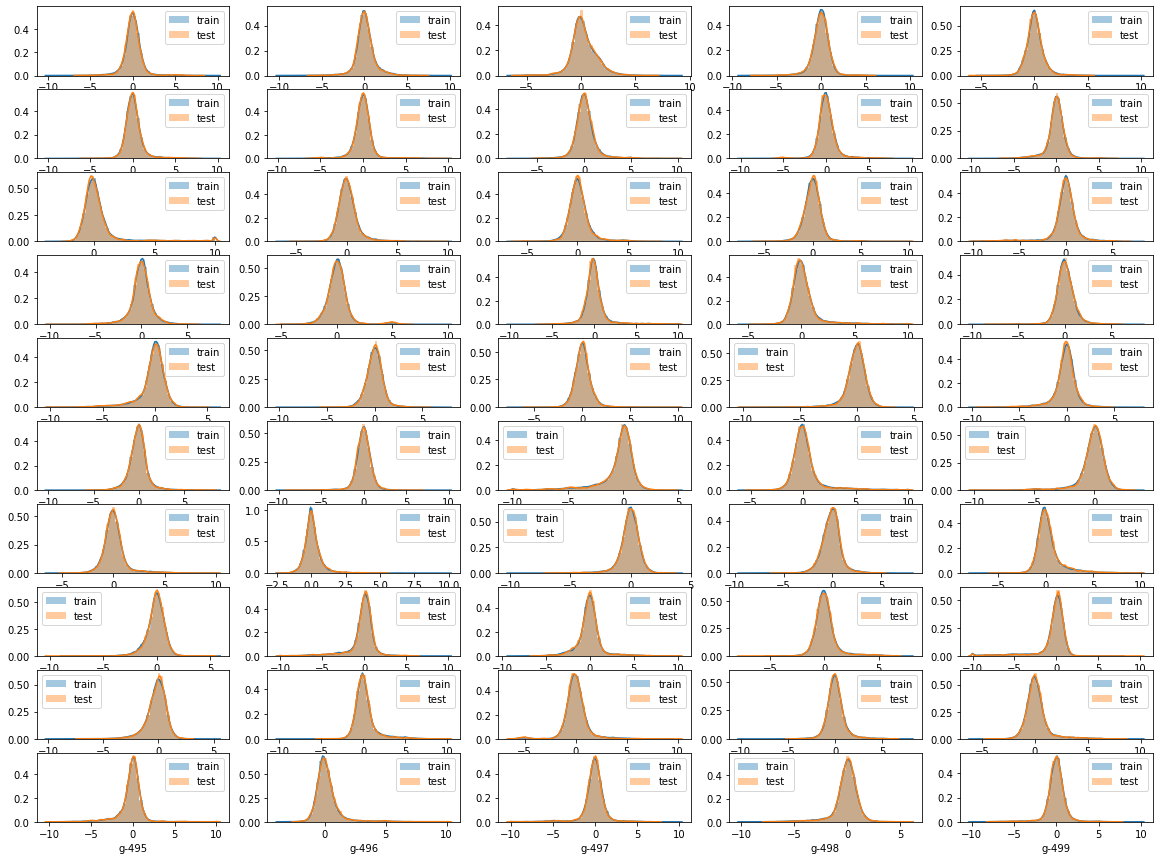

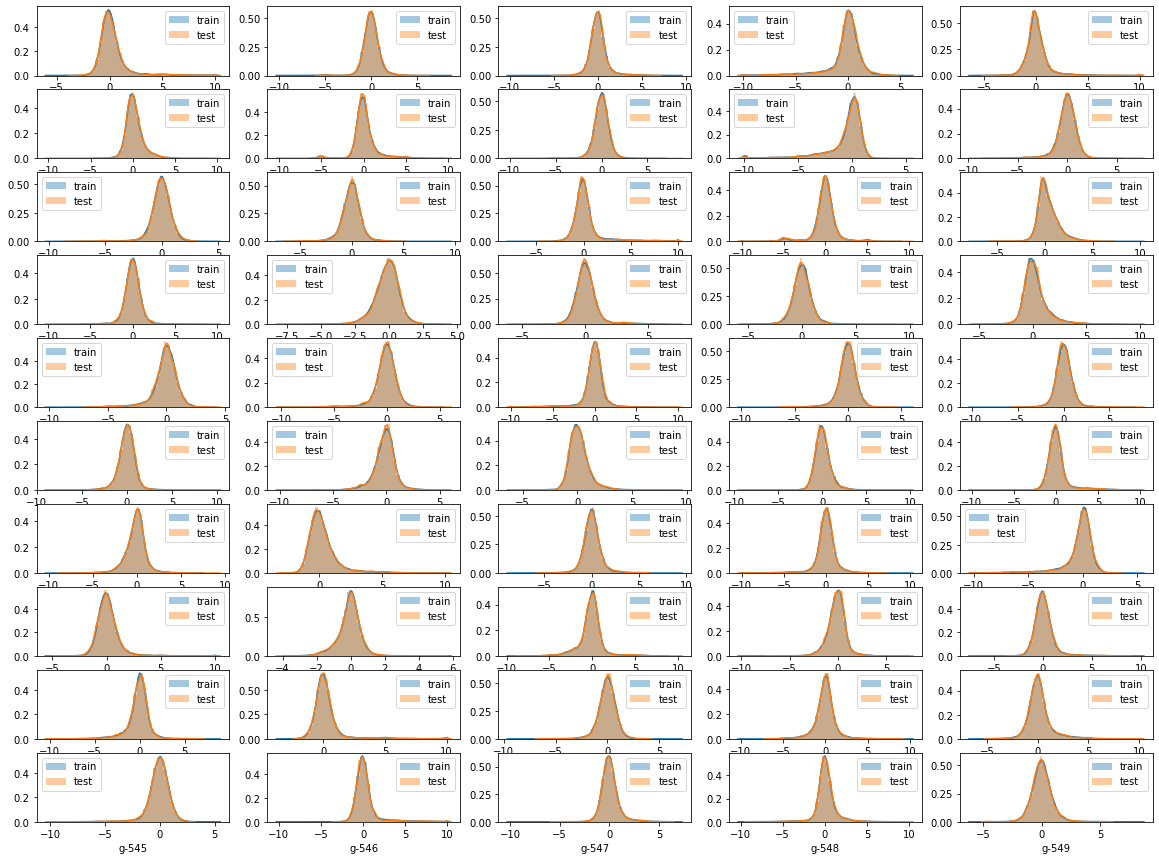

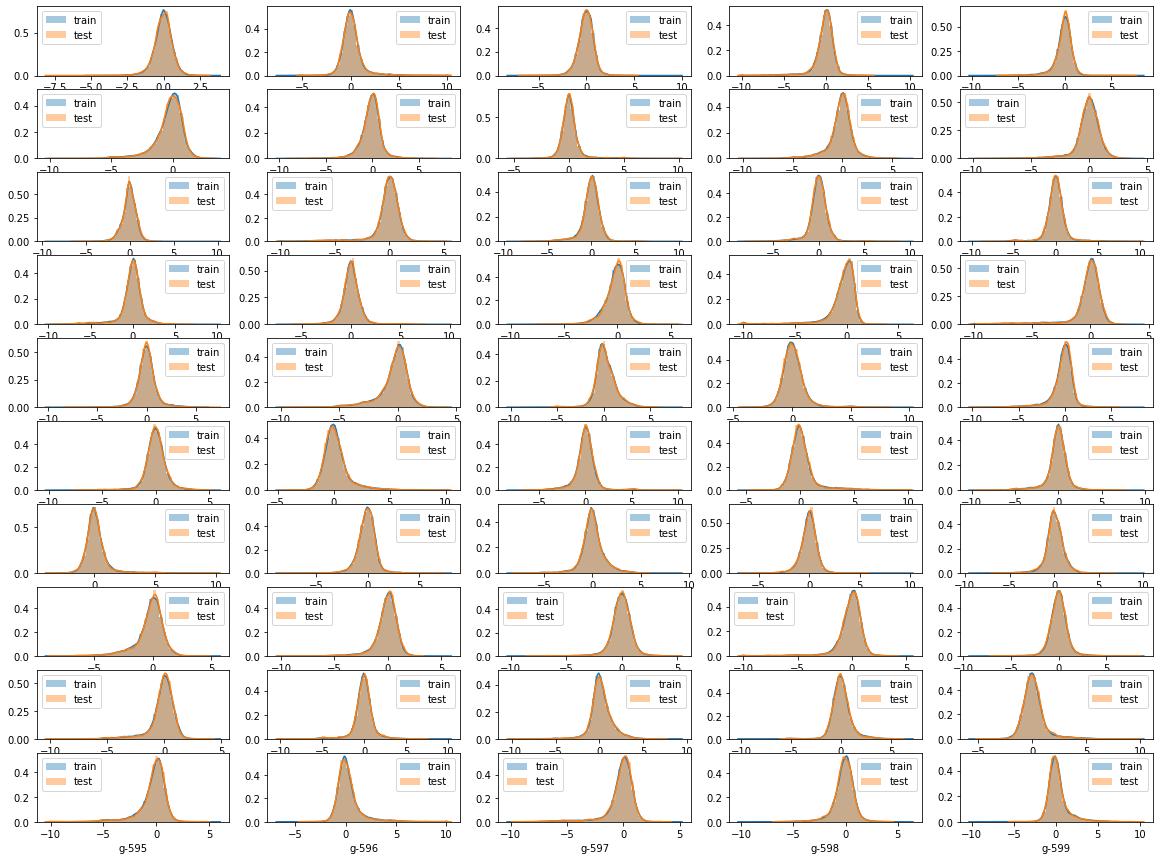

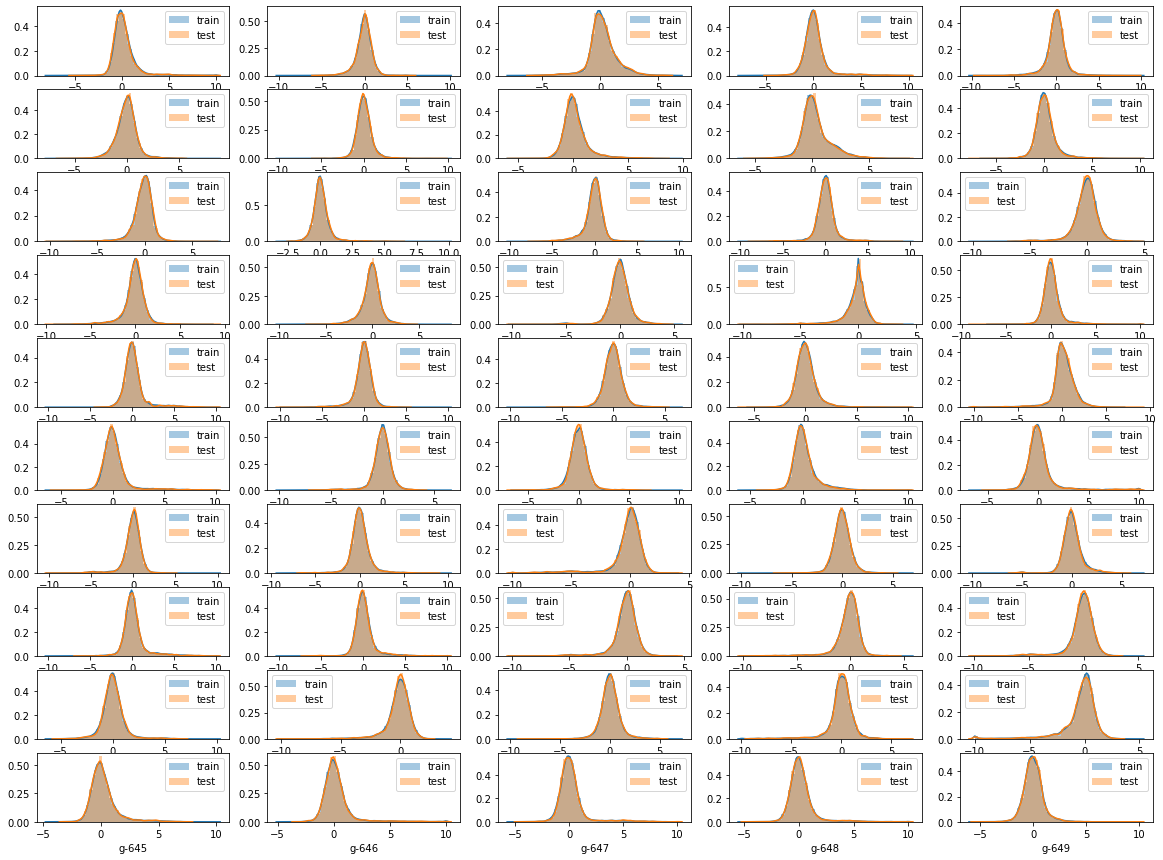

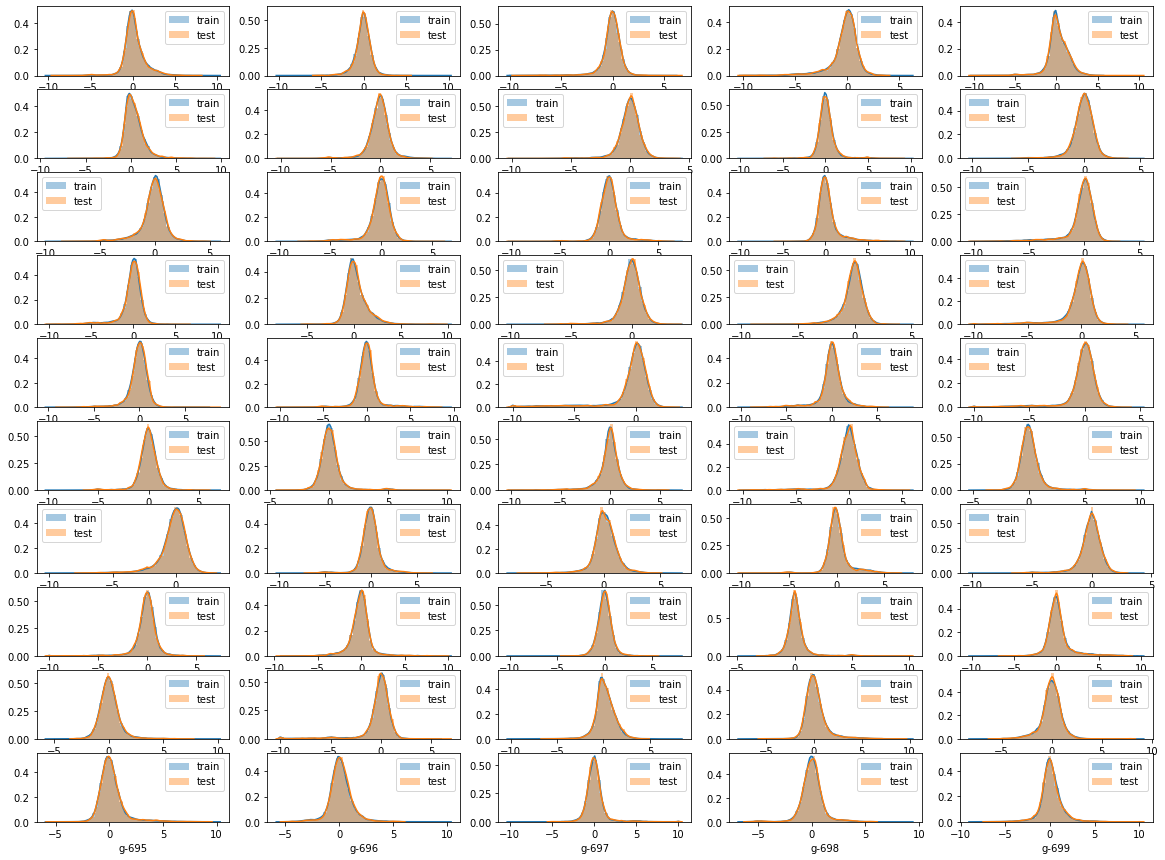

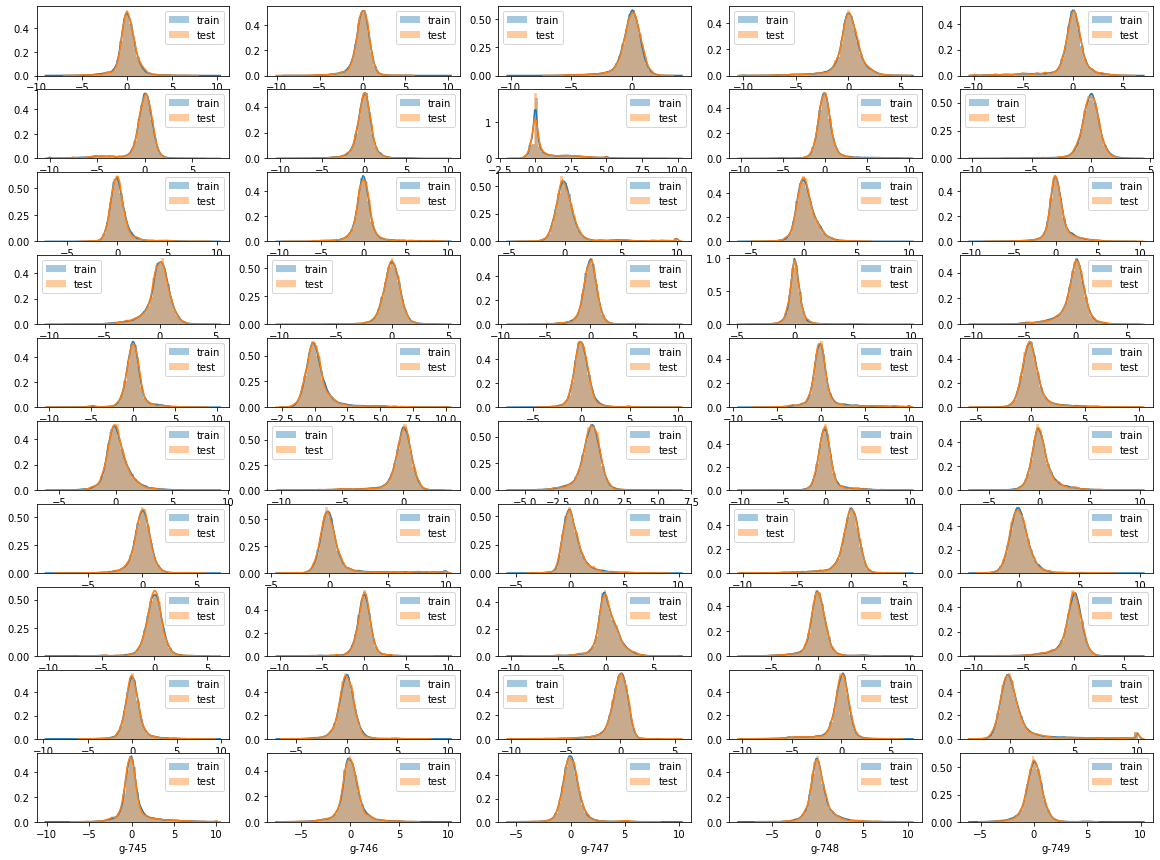

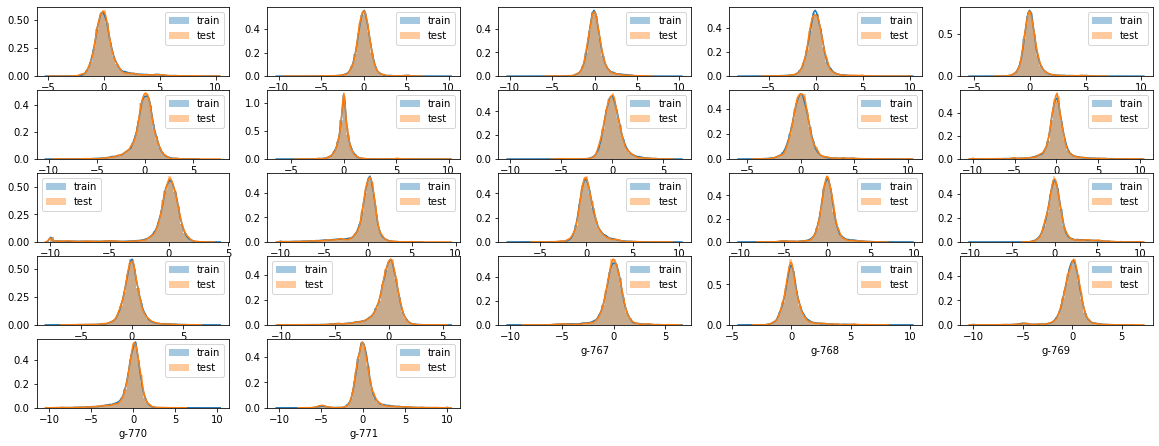

In [27]:
for k in range(len(g_feats)//50 + 1):
    plt.figure(figsize=(20,15))
    for i in range(50*k, 50*(k+1)):
        if i <= len(g_feats)-1:
            plt.subplot(10,5,i+1-50*k)
            sns.distplot(train_feat["g-"+str(i)], label = "train")
            sns.distplot(test_feat["g-"+str(i)], label = "test")
            plt.legend(loc="best")

## per row

Text(0.5, 1.0, 'test range distribution')

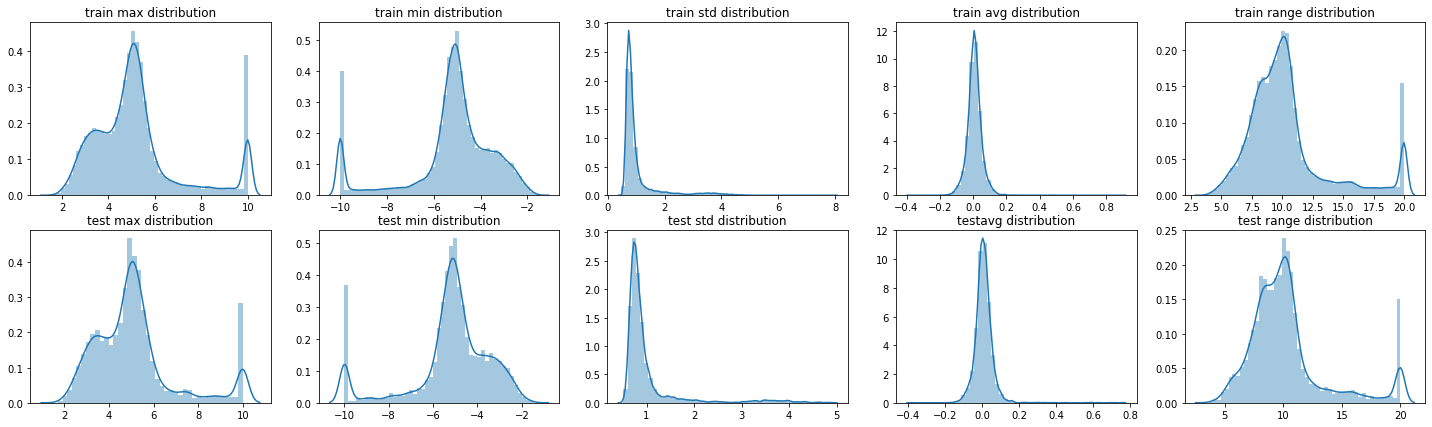

In [28]:
# there are many row with minimum value of -10 or maximum value of 10
plt.figure(figsize=(25,7))
plt.subplot(2,5,1)
sns.distplot(np.max(train_feat[g_feats], axis=1))
plt.title("train max distribution")
plt.subplot(2,5,2)
sns.distplot(np.min(train_feat[g_feats], axis=1))
plt.title("train min distribution")
plt.subplot(2,5,3)
sns.distplot(np.std(train_feat[g_feats], axis=1))
plt.title("train std distribution")
plt.subplot(2,5,4)
sns.distplot(np.mean(train_feat[g_feats], axis=1))
plt.title("train avg distribution")
plt.subplot(2,5,5)
sns.distplot(np.max(train_feat[g_feats], axis=1)-np.min(train_feat[g_feats], axis=1))
plt.title("train range distribution")

plt.subplot(2,5,6)
sns.distplot(np.max(test_feat[g_feats], axis=1))
plt.title("test max distribution")
plt.subplot(2,5,7)
sns.distplot(np.min(test_feat[g_feats], axis=1))
plt.title("test min distribution")
plt.subplot(2,5,8)
sns.distplot(np.std(test_feat[g_feats], axis=1))
plt.title("test std distribution")
plt.subplot(2,5,9)
sns.distplot(np.mean(test_feat[g_feats], axis=1))
plt.title("testavg distribution")
plt.subplot(2,5,10)
sns.distplot(np.max(test_feat[g_feats], axis=1)-np.min(test_feat[g_feats], axis=1))
plt.title("test range distribution")

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



train 768 392
test  766 690


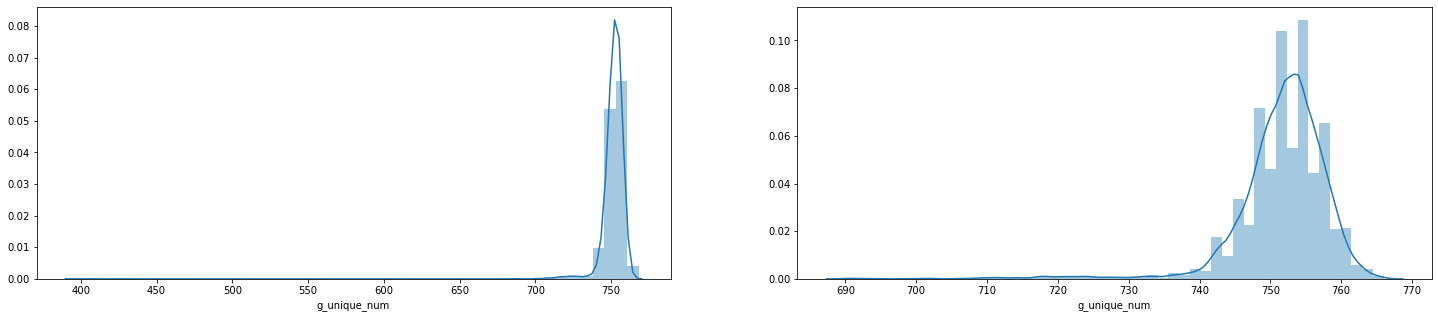

In [29]:
# unique value
def calc(row):
    return len(np.unique(row[g_feats].values))

tqdm_notebook.pandas(desc="progress")
train_feat["g_unique_num"] = train_feat.progress_apply(calc, axis=1)
test_feat["g_unique_num"] = test_feat.progress_apply(calc, axis=1)
print("train", np.max(train_feat["g_unique_num"]), np.min(train_feat["g_unique_num"]))
print("test ", np.max(test_feat["g_unique_num"]), np.min(test_feat["g_unique_num"]))
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.distplot(train_feat["g_unique_num"])
plt.subplot(1,2,2)
sns.distplot(test_feat["g_unique_num"])

In [30]:
# except an example with 392 unique values, others have at least 681
tmp = pd.DataFrame(train_feat["g_unique_num"].value_counts().reset_index(drop=False))
tmp.columns = ["g_unique_num", "no"]
np.transpose(tmp)

0     1     2     3     4     5     6     7     8     9   \
g_unique_num   754   753   752   751   755   756   750   749   757   748   
no            2036  2020  1954  1801  1779  1733  1620  1446  1359  1157   

                10   11   12   13   14   15   16   17   18   19   20   21  \
g_unique_num   758  747  759  746  745  760  744  761  743  762  742  741   
no            1022  930  749  706  559  500  361  316  286  207  193  130   

               22   23   24   25   26   27   28   29   30   31   32   33   34  \
g_unique_num  740  763  739  738  764  736  726  737  735  765  722  733  728   
no            102   99   64   54   53   29   27   26   25   24   24   23   23   

               35   36   37   38   39   40   41   42   43   44   45   46   47  \
g_unique_num  724  723  734  715  717  732  719  729  720  718  727  725  731   
no             22   21   21   20   20   19   18   17   17   17   16   16   15   

               48   49   50   51   52   53   54   55   56   57   58   59   60  \
g_unique_num  730  766  721  714  708  712  716  709  710  711  713  707  706   
no             14   12   12   11   10    9    9    7    7    7    7    6    4   

               61   62   63   64   65   66   67   68   69   70   71   72   73  \
g_unique_num  703  768  699  705  702  704  767  690  691  392  681  700  701   
no              4    2    2    2    2    2    1    1    1    1    1    1    1   

               74   75  
g_unique_num  687  688  
no              1    1

In [31]:
#
tmp = train_feat[train_feat["g_unique_num"]==392][g_feats].copy()
print(tmp.T[16674].value_counts())
tmp

-10.000    204
 10.000    175
 4.824       2
 7.601       2
 6.688       2
          ... 
-4.173       1
-8.021       1
 3.605       1
 1.092       1
-1.628       1
Name: 16674, Length: 392, dtype: int64


g-0    g-1    g-2   g-3    g-4    g-5   g-6    g-7   g-8    g-9  \
16674  1.902  3.796  3.323  10.0  2.016 -2.356 -5.52  2.832 -10.0 -2.664   

       g-10    g-11    g-12  g-13   g-14  g-15  g-16  g-17   g-18  g-19  g-20  \
16674 -10.0 -0.3405 -0.0417  10.0 -3.093 -10.0 -10.0 -10.0  7.381 -10.0  -3.8   

       g-21  g-22  g-23  g-24    g-25   g-26   g-27  g-28   g-29  g-30  g-31  \
16674  1.33 -10.0 -10.0  10.0  0.9036  6.322 -1.416  10.0  4.479  10.0  7.95   

         g-32  g-33  g-34   g-35  g-36  g-37  g-38  g-39  g-40   g-41  g-42  \
16674 -0.1157  10.0 -10.0 -9.261 -10.0  4.78 -10.0  10.0 -10.0  5.301 -10.0   

       g-43  g-44  g-45  g-46   g-47   g-48   g-49   g-50  g-51  g-52  g-53  \
16674  10.0  10.0  10.0  10.0  1.668  3.675 -6.577  2.845 -10.0  10.0  10.0   

       g-54  g-55  g-56    g-57   g-58  g-59  g-60   g-61   g-62  g-63  g-64  \
16674  10.0 -10.0 -10.0  0.7102 -3.502  10.0  10.0 -6.278  9.912 -10.0  10.0   

        g-65   g-66  g-67  g-68   g-69  g-70  g-71  g-72   g-73  g-74  g-75  \
16674 -1.206 -5.525  -1.8  10.0 -1.534   4.9 -10.0 -10.0 -2.867  10.0 -10.0   

       g-76   g-77  g-78   g-79  g-80  g-81  g-82  g-83  g-84  g-85  g-86  \
16674 -10.0 -1.949 -10.0  6.258 -10.0  4.76 -10.0  10.0  10.0 -10.0  10.0   

       g-87  g-88  g-89   g-90   g-91   g-92  g-93  g-94   g-95   g-96  g-97  \
16674 -6.93  10.0 -10.0  7.753  5.019 -7.951  10.0  10.0  4.921 -1.839  10.0   

        g-98  g-99  g-100  g-101  g-102  g-103  g-104  g-105  g-106  g-107  \
16674  2.921 -10.0   10.0  1.408  2.823   10.0   10.0   9.91   10.0 -2.505   

        g-108  g-109  g-110  g-111  g-112   g-113  g-114  g-115  g-116  g-117  \
16674 -0.4007 -3.571  -10.0   10.0  -10.0 -0.5328   10.0 -2.442 -6.753   10.0   

       g-118  g-119  g-120  g-121  g-122  g-123  g-124  g-125  g-126  g-127  \
16674  9.492  4.997 -6.064  -10.0  -7.89   10.0  -10.0  -10.0  9.068  4.277   

       g-128  g-129  g-130  g-131  g-132  g-133  g-134   g-135  g-136  g-137  \
16674 -4.547  -10.0   10.0  5.528   10.0 -7.753  -10.0  0.5173   10.0  1.803   

       g-138  g-139  g-140  g-141  g-142  g-143  g-144   g-145  g-146  g-147  \
16674  4.789  -10.0  3.335  -10.0   10.0  -10.0   10.0 -0.5747  9.477   10.0   

       g-148  g-149  g-150  g-151  g-152  g-153  g-154  g-155  g-156  g-157  \
16674 -4.718   10.0  6.009  9.959  7.382  -10.0 -6.287   10.0  2.929  -10.0   

       g-158  g-159  g-160  g-161  g-162  g-163  g-164  g-165  g-166  g-167  \
16674 -2.149 -3.799  1.829 -8.021   7.14  8.969 -2.177  5.405 -1.587  -9.35   

       g-168  g-169  g-170  g-171  g-172  g-173   g-174  g-175  g-176  g-177  \
16674 -6.565   10.0   10.0   10.0  5.854  -10.0 -0.7259  7.402  9.243  4.824   

       g-178  g-179  g-180  g-181  g-182  g-183  g-184  g-185  g-186  g-187  \
16674  -10.0 -5.661  -10.0  8.591 -4.226 -2.836  -10.0  -10.0  -10.0  8.161   

       g-188  g-189  g-190  g-191  g-192  g-193  g-194  g-195  g-196  g-197  \
16674  -10.0  2.226  -10.0  6.663   10.0  -10.0  -10.0   4.46  7.866   10.0   

       g-198  g-199  g-200  g-201  g-202  g-203  g-204   g-205  g-206  g-207  \
16674   10.0  -10.0 -7.432  2.068  -10.0   10.0  -10.0  0.1465   10.0  5.313   

       g-208  g-209  g-210  g-211  g-212  g-213   g-214  g-215  g-216  g-217  \
16674   10.0  3.458   10.0 -4.523   10.0  8.365 -0.2274   10.0   10.0 -8.417   

       g-218  g-219  g-220  g-221  g-222  g-223  g-224  g-225  g-226  g-227  \
16674 -4.503   10.0  2.789  -10.0 -2.543 -6.311 -4.306  7.021   10.0  -10.0   

        g-228  g-229  g-230  g-231  g-232  g-233  g-234  g-235  g-236  g-237  \
16674 -0.0643 -4.814  9.537 -3.665   10.0  -10.0  9.509  7.398  -10.0  -10.0   

       g-238  g-239  g-240  g-241  g-242  g-243  g-244  g-245  g-246  g-247  \
16674 -9.056  -10.0   10.0  -10.0   10.0   10.0   10.0   10.0   10.0  -10.0   

       g-248  g-249  g-250  g-251  g-252  g-253  g-254  g-255  g-256  g-257  \
16674 -1.704   10.0 -3.015   10.0  -10.0 -7.445  -10.0  6.332  -10.0  -10.0   

       g-258  g-259 

In [32]:
tmp = train_feat[train_feat["g_unique_num"]==681][g_feats].copy()
print(tmp.T[22971].value_counts())
tmp

-10.0000    38
 10.0000    36
 0.6745      3
-4.3280      3
-3.5620      2
            ..
-1.9420      1
 2.3900      1
-1.6650      1
 1.6670      1
-1.4700      1
Name: 22971, Length: 681, dtype: int64


g-0     g-1    g-2    g-3     g-4    g-5    g-6    g-7   g-8    g-9  \
22971  8.057 -0.3999  1.018 -1.789  0.6745 -5.299  4.793 -1.168 -10.0 -1.275   

        g-10    g-11   g-12   g-13  g-14   g-15   g-16   g-17   g-18   g-19  \
22971 -5.577  0.4181  4.567  3.107 -2.39 -1.992 -7.533 -8.908 -1.524 -4.269   

         g-20    g-21   g-22   g-23   g-24   g-25   g-26    g-27   g-28  \
22971 -0.2691 -0.3336 -2.968 -4.424  2.764 -1.065 -6.385  0.9783 -1.711   

        g-29   g-30  g-31   g-32   g-33   g-34   g-35   g-36   g-37  g-38  \
22971  6.036 -4.289  10.0 -2.455  7.648 -4.226  1.859  3.574 -8.401  10.0   

        g-39  g-40   g-41   g-42  g-43   g-44   g-45   g-46   g-47   g-48  \
22971  7.282 -10.0 -8.567 -9.979  2.81  4.725 -7.539  1.814 -5.389 -6.403   

        g-49   g-50   g-51  g-52  g-53   g-54  g-55   g-56    g-57   g-58  \
22971  2.373 -3.528  3.586  2.45  10.0  8.018 -9.25 -1.936  0.3042  3.101   

        g-59   g-60   g-61  g-62   g-63   g-64   g-65   g-66   g-67   g-68  \
22971  6.785  1.251 -4.935 -10.0 -6.385  2.362  1.111 -2.742 -2.668  1.182   

       g-69   g-70   g-71  g-72  g-73  g-74  g-75   g-76   g-77   g-78   g-79  \
22971  2.96 -1.613  2.998 -10.0  6.94  10.0 -10.0  7.911 -0.345  1.063  4.128   

       g-80   g-81  g-82   g-83   g-84  g-85   g-86   g-87   g-88   g-89  \
22971 -6.05 -2.498  2.39  3.496  4.378  0.48  9.579 -5.495 -2.953 -3.714   

       g-90  g-91    g-92   g-93  g-94   g-95   g-96   g-97   g-98    g-99  \
22971  3.65  10.0 -0.5442 -5.339  1.74  1.483 -2.753  3.159 -2.799  0.4488   

       g-100  g-101  g-102  g-103  g-104  g-105  g-106  g-107  g-108  g-109  \
22971  7.512 -1.396  3.953  5.541  1.278  1.377  3.641  -10.0 -2.341 -4.477   

       g-110   g-111  g-112  g-113  g-114  g-115   g-116  g-117  g-118  g-119  \
22971 -1.403  0.5337 -6.043 -8.156 -0.891  2.493  0.4021  4.416  4.834  1.976   

        g-120  g-121  g-122  g-123  g-124  g-125  g-126  g-127  g-128  g-129  \
22971 -0.6902  -10.0   1.34   10.0 -1.355 -4.042  5.954 -4.762  -10.0 -1.215   

       g-130  g-131  g-132  g-133  g-134  g-135  g-136  g-137  g-138  g-139  \
22971  1.667   10.0  3.836  -10.0 -4.375  3.979  1.363  0.171 -5.551   4.06   

       g-140   g-141  g-142   g-143  g-144  g-145  g-146  g-147  g-148  \
22971  2.423 -0.6509  4.153 -0.5737  9.765  3.141   10.0  9.659  2.579   

        g-149  g-150  g-151  g-152  g-153  g-154  g-155  g-156  g-157  g-158  \
22971  0.6354  -1.69  1.534 -8.736 -0.097  -9.07  3.961 -2.306 -3.376  -2.11   

       g-159  g-160  g-161  g-162  g-163  g-164  g-165  g-166  g-167   g-168  \
22971 -1.675  -10.0  2.238  5.783  3.523   5.68 -8.944 -3.419  -6.53  0.6036   

       g-169  g-170  g-171  g-172  g-173  g-174  g-175   g-176  g-177  g-178  \
22971   10.0  7.828  2.096 -4.324 -7.763  1.149 -7.297 -0.3645  9.224  -10.0   

       g-179  g-180  g-181  g-182  g-183  g-184  g-185  g-186  g-187  g-188  \
22971 -3.554  2.418  7.138 -1.105 -5.807 -4.556 -8.861  -10.0 -4.339  2.367   

       g-189  g-190  g-191  g-192  g-193  g-194  g-195  g-196  g-197  g-198  \
22971 -4.734 -8.021  1.774  6.448  -5.63 -6.437 -5.247 -3.562   10.0  5.023   

       g-199  g-200  g-201  g-202  g-203   g-204  g-205  g-206  g-207  g-208  \
22971  -1.57 -1.681   5.06  -10.0 -4.492  0.2479  1.781 -1.946 -3.307  7.395   

        g-209  g-210  g-211  g-212  g-213   g-214  g-215  g-216  g-217  g-218  \
22971  0.4804  9.366   10.0 -0.566  5.962  0.2118   10.0  1.506 -1.774  -10.0   

       g-219  g-220  g-221  g-222  g-223  g-224  g-225  g-226   g-227  g-228  \
22971  1.472  3.222 -6.482 -3.491 -1.699 -5.105  9.372  8.389 -0.6175 -3.177   

       g-229  g-230  g-231  g-232   g-233  g-234  g-235  g-236  g-237  g-238  \
22971  6.944  7.161 -9.575  8.247 -0.1049  6.527   1.75  5.508 -4.463  -5.89   

       g-239  g-240  g-241   g-242  g-243  g-244  g-245  g-246   g-247  g-248  \
22971 -5.988  7.677 -6.632  0.3535   10.0  3.629  2.896 -3.806 -0.4447  9.786   

       g-249  g-250  g-251  g-252   g-253 

# c variables

In [33]:
# clear correlations in c variables
c_feats = [i for i in train_feat.columns if "c-" in i]
correlations = train_feat[c_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(10)

level_0 level_1         0
9890    c-11    c-55  0.914637
9891    c-55    c-11  0.914637
9892     c-6    c-33  0.914730
9893    c-33     c-6  0.914730
9894    c-13    c-26  0.921875
9895    c-26    c-13  0.921875
9896    c-73    c-13  0.923344
9897    c-13    c-73  0.923344
9898    c-52    c-42  0.924619
9899    c-42    c-52  0.924619

In [34]:
correlations.head(10)

level_0 level_1         0
0    c-22    c-16  0.612084
1    c-16    c-22  0.612084
2    c-58    c-74  0.649353
3    c-74    c-58  0.649353
4    c-37    c-22  0.649890
5    c-22    c-37  0.649890
6    c-22    c-74  0.658046
7    c-74    c-22  0.658046
8    c-74    c-37  0.658788
9    c-37    c-74  0.658788

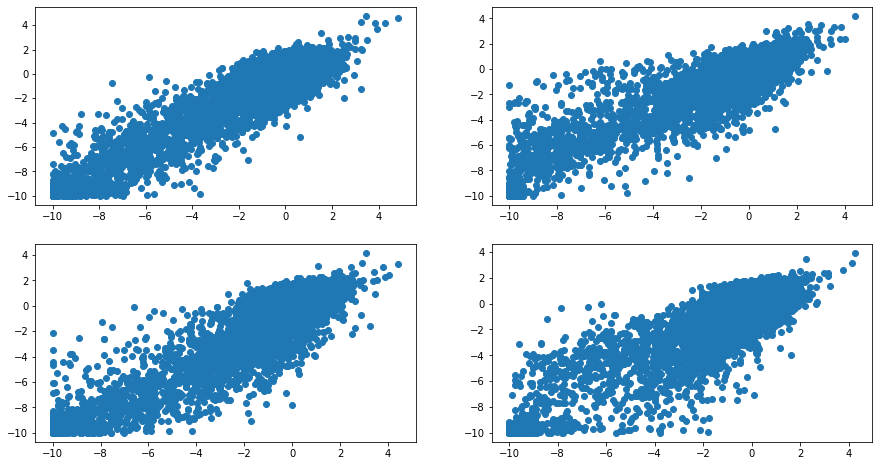

In [35]:
# some correlated examples
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(train_feat["c-52"], train_feat["c-42"])
plt.subplot(2,2,2)
plt.scatter(train_feat["c-13"], train_feat["c-73"])
plt.subplot(2,2,3)
plt.scatter(train_feat["c-13"], train_feat["c-26"])
plt.subplot(2,2,4)
plt.scatter(train_feat["c-33"], train_feat["c-6"])

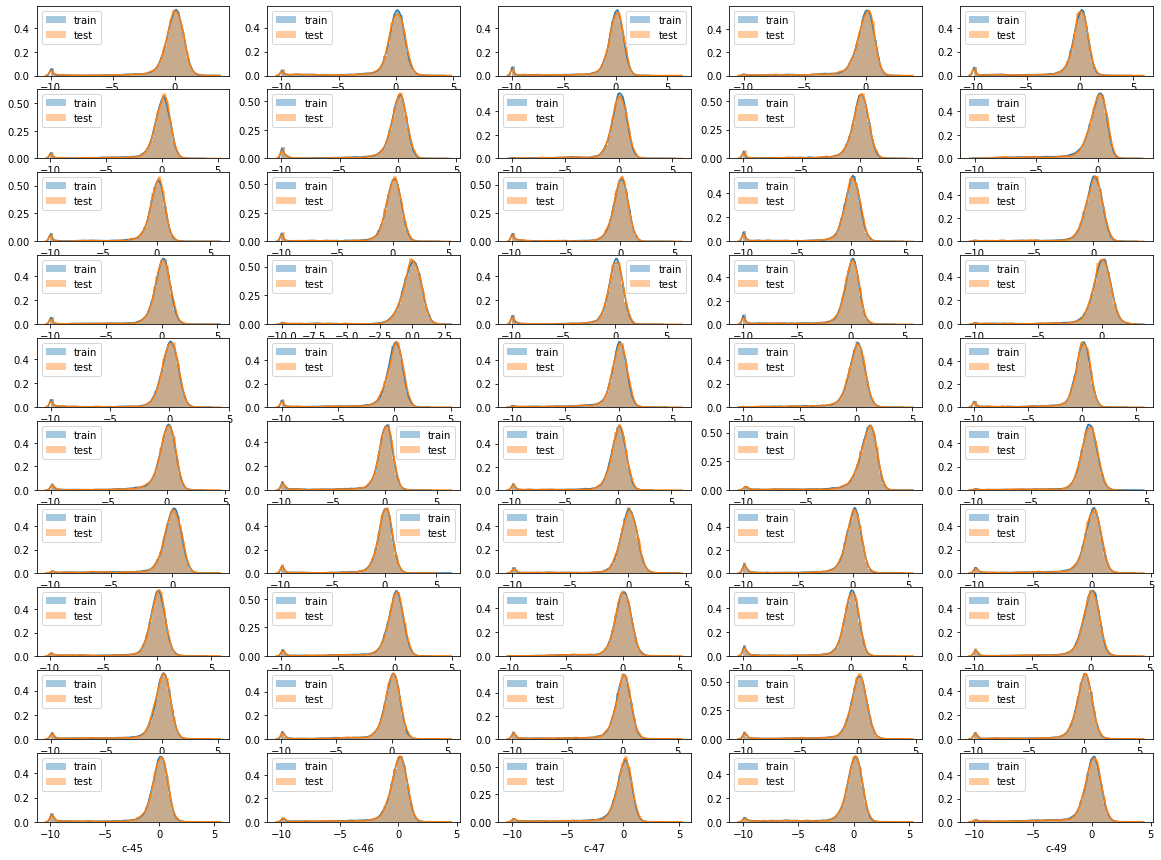

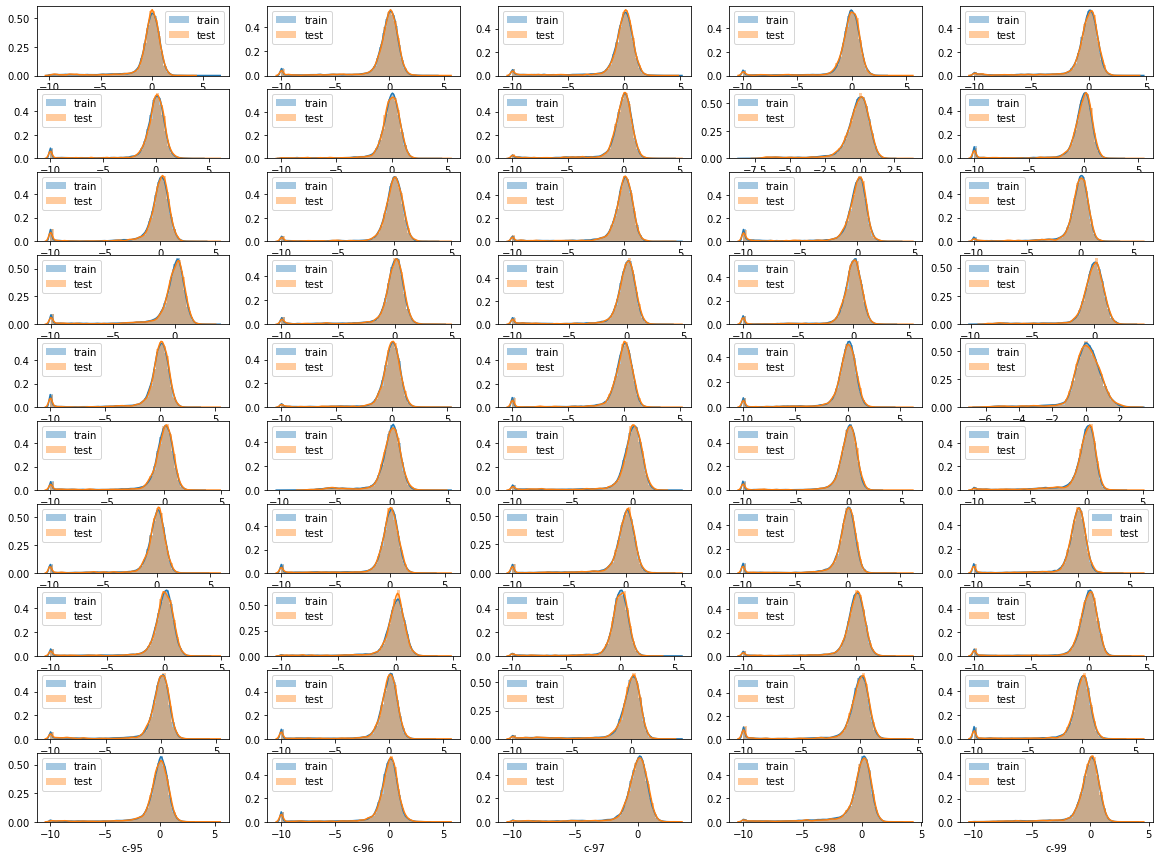

<Figure size 1440x1080 with 0 Axes>

In [36]:
for k in range(len(c_feats)//50 + 1):
    plt.figure(figsize=(20,15))
    for i in range(50*k, 50*(k+1)):
        if i <= len(c_feats)-1:
            plt.subplot(10,5,i+1-50*k)
            sns.distplot(train_feat["c-"+str(i)], label = "train")
            sns.distplot(test_feat["c-"+str(i)], label = "test")
            plt.legend(loc="best")

In [37]:
# TSNE
#print(len(c_feats))
#pca = PCA(n_components=50)
#pca.fit(train_feat[c_feats])
#print(np.sum(np.array(pca.explained_variance_ratio_)))

#mod_c_feats = pca.fit_transform(train_feat[c_feats])

#tsne = TSNE(random_state=0, metric="cosine")
#embs = tsne.fit_transform(mod_c_feats)
#plt.plot(embs[:,0], embs[:,1])

## per row

Text(0.5, 1.0, 'test range distribution')

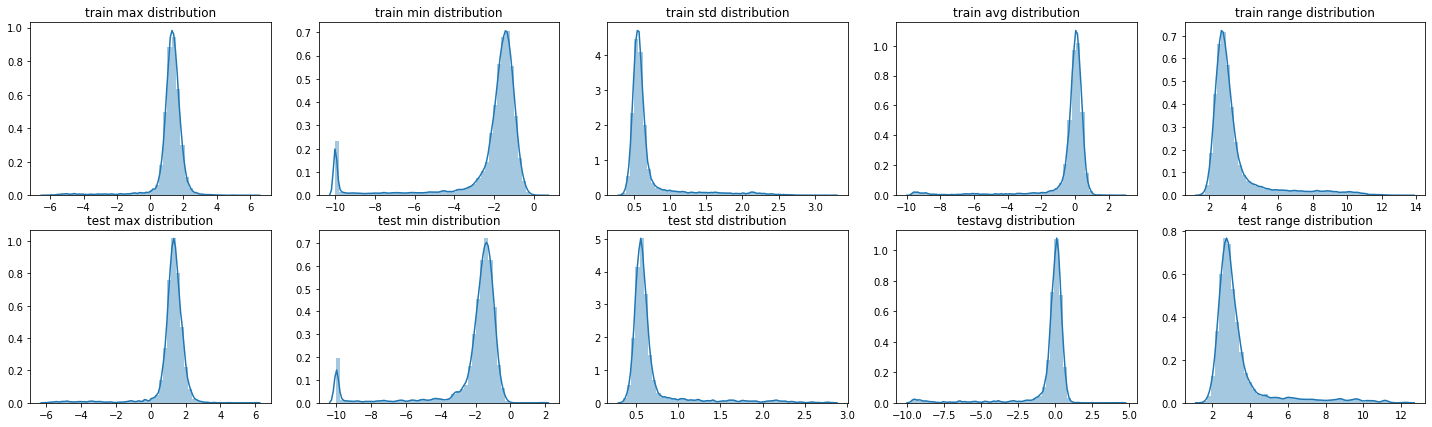

In [38]:
# there are many row with minimum value of -10 or maximum value of 10
plt.figure(figsize=(25,7))
plt.subplot(2,5,1)
sns.distplot(np.max(train_feat[c_feats], axis=1))
plt.title("train max distribution")
plt.subplot(2,5,2)
sns.distplot(np.min(train_feat[c_feats], axis=1))
plt.title("train min distribution")
plt.subplot(2,5,3)
sns.distplot(np.std(train_feat[c_feats], axis=1))
plt.title("train std distribution")
plt.subplot(2,5,4)
sns.distplot(np.mean(train_feat[c_feats], axis=1))
plt.title("train avg distribution")
plt.subplot(2,5,5)
sns.distplot(np.max(train_feat[c_feats], axis=1)-np.min(train_feat[c_feats], axis=1))
plt.title("train range distribution")

plt.subplot(2,5,6)
sns.distplot(np.max(test_feat[c_feats], axis=1))
plt.title("test max distribution")
plt.subplot(2,5,7)
sns.distplot(np.min(test_feat[c_feats], axis=1))
plt.title("test min distribution")
plt.subplot(2,5,8)
sns.distplot(np.std(test_feat[c_feats], axis=1))
plt.title("test std distribution")
plt.subplot(2,5,9)
sns.distplot(np.mean(test_feat[c_feats], axis=1))
plt.title("testavg distribution")
plt.subplot(2,5,10)
sns.distplot(np.max(test_feat[c_feats], axis=1)-np.min(test_feat[c_feats], axis=1))
plt.title("test range distribution")

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



train 100 8
test  100 14


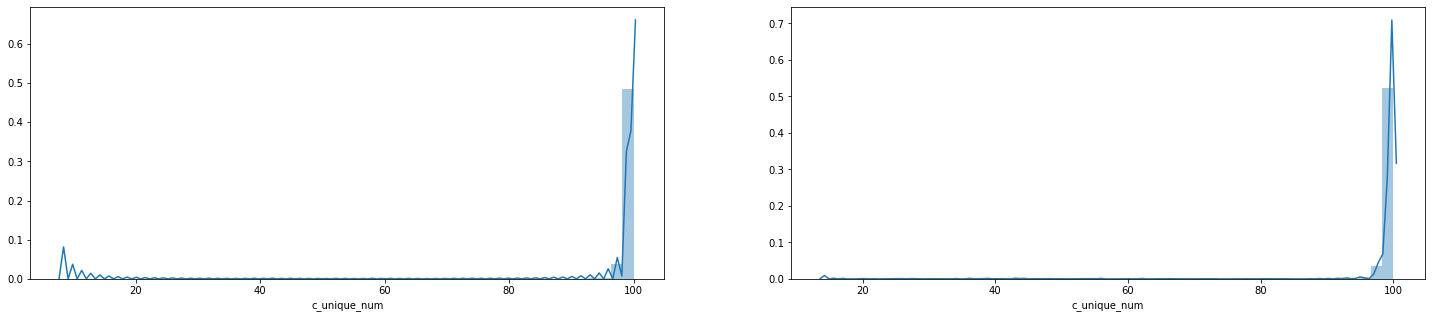

In [39]:
# unique value
def calc(row):
    return len(np.unique(row[c_feats].values))

tqdm_notebook.pandas(desc="progress")
train_feat["c_unique_num"] = train_feat.progress_apply(calc, axis=1)
test_feat["c_unique_num"] = test_feat.progress_apply(calc, axis=1)

print("train", np.max(train_feat["c_unique_num"]), np.min(train_feat["c_unique_num"]))
print("test ", np.max(test_feat["c_unique_num"]), np.min(test_feat["c_unique_num"]))

plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.distplot(train_feat["c_unique_num"])
plt.subplot(1,2,2)
sns.distplot(test_feat["c_unique_num"])

In [40]:
tmp = pd.DataFrame(train_feat["c_unique_num"].value_counts().reset_index(drop=False))
tmp.columns = ["c_unique_num", "no"]
np.transpose(tmp)

0     1     2    3    4   5   6   7   8   9   10  11  12  13  \
c_unique_num    100    99    98   97   96  95  94  91  92  93  87  46  32  34   
no            15452  5782  1413  266  100  53  35  21  21  18  16  15  15  14   

              14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  \
c_unique_num  45  50  39  86  38  90  54  42  37  49  52  28  44  89  88  31   
no            14  14  14  14  14  14  13  13  13  12  12  12  12  11  11  11   

              30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  \
c_unique_num  25  41  35  84  48  73  27  47  26  58  85  40  33  64  51  24   
no            11  11  11  10  10  10  10  10  10  10  10  10  10   9   9   9   

              46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  \
c_unique_num  30  72  21  71  61  59  57  74  78  66  43  20  19  60  53  79   
no             9   9   8   8   8   8   8   8   7   7   7   7   7   7   7   6   

              62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  \
c_unique_num  83  70  29  65  82  62  36  63  69  56  81  77  55  23  68  22   
no             6   6   6   6   5   5   5   5   5   4   4   4   4   4   4   4   

              78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  
c_unique_num  76  75  13  18  80  11  15  12  67  17  14   8  10   9  16  
no             4   3   3   3   3   3   2   2   2   1   1   1   1   1   1

In [41]:
tmp = train_feat[train_feat["c_unique_num"]==8][c_feats].copy()
print(tmp.T[1021].value_counts())
tmp

-10.000    69
-9.803     25
-8.583      1
-7.314      1
-9.839      1
-5.585      1
-9.038      1
-5.934      1
Name: 1021, dtype: int64


c-0   c-1   c-2   c-3   c-4   c-5   c-6   c-7   c-8    c-9  c-10  c-11  \
1021 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -8.583 -10.0 -10.0   

      c-12  c-13  c-14  c-15  c-16  c-17  c-18  c-19  c-20  c-21  c-22   c-23  \
1021 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -9.038   

      c-24   c-25   c-26   c-27   c-28   c-29   c-30   c-31   c-32   c-33  \
1021 -10.0 -9.803 -9.803 -9.803 -9.803 -9.803 -9.803 -9.803 -9.803 -9.803   

       c-34   c-35   c-36   c-37   c-38   c-39   c-40   c-41   c-42   c-43  \
1021 -9.803 -9.803 -9.803 -9.803 -9.803 -9.803 -9.803 -9.803 -9.803 -9.803   

       c-44   c-45   c-46   c-47   c-48   c-49  c-50  c-51  c-52  c-53  c-54  \
1021 -9.803 -9.803 -9.803 -9.803 -9.803 -9.803 -10.0 -10.0 -10.0 -10.0 -10.0   

      c-55  c-56  c-57   c-58  c-59  c-60  c-61  c-62  c-63  c-64  c-65  c-66  \
1021 -10.0 -10.0 -10.0 -7.314 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0   

      c-67  c-68   c-69  c-70  c-71  c-72  c-73   c-74  c-75   c-76  c-77  \
1021 -10.0 -10.0 -9.839 -10.0 -10.0 -10.0 -10.0 -5.934 -10.0 -5.585 -10.0   

      c-78  c-79  c-80  c-81  c-82  c-83  c-84  c-85  c-86  c-87  c-88  c-89  \
1021 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0   

      c-90  c-91  c-92  c-93  c-94  c-95  c-96  c-97  c-98  c-99  
1021 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0

In [42]:
train_feat[train_feat["c_unique_num"]==11][c_feats]

c-0    c-1    c-2    c-3    c-4    c-5    c-6    c-7    c-8    c-9  \
10399 -9.966 -9.966 -9.966 -9.966 -9.966 -9.966 -9.966 -9.966 -9.966 -7.840   
16234 -9.936 -9.936 -9.936 -9.936 -9.936 -9.936 -9.936 -9.936 -9.936 -8.603   
20508 -9.961 -9.961 -9.961 -9.961 -9.961 -9.961 -9.961 -9.961 -9.961 -7.982   

        c-10   c-11   c-12   c-13   c-14   c-15   c-16   c-17   c-18   c-19  \
10399 -9.966 -9.966 -9.966 -9.966 -9.966 -9.966 -9.966 -9.966 -9.966 -9.487   
16234 -9.936 -9.936 -9.936 -9.936 -9.723 -9.936 -9.936 -9.936 -9.936 -9.936   
20508 -9.961 -9.961 -9.961 -9.961 -9.961 -9.961 -9.961 -9.961 -9.961 -9.961   

        c-20   c-21   c-22   c-23   c-24   c-25   c-26   c-27   c-28   c-29  \
10399 -9.966 -9.966 -9.966 -9.966 -9.966 -9.813 -9.813 -9.813 -9.813 -9.813   
16234 -9.936 -9.936 -9.936 -9.126 -9.936 -9.809 -9.809 -9.809 -9.809 -9.809   
20508 -9.961 -9.961 -9.961 -9.961 -9.961 -9.876 -9.876 -9.876 -9.876 -9.876   

        c-30   c-31   c-32   c-33   c-34   c-35   c-36   c-37   c-38   c-39  \
10399 -9.813 -9.813 -9.813 -9.813 -9.813 -9.813 -9.813 -9.813 -9.813 -9.813   
16234 -9.809 -9.809 -9.809 -9.809 -9.809 -9.809 -9.809 -9.809 -9.809 -9.809   
20508 -9.876 -9.876 -9.876 -9.876 -9.876 -9.876 -9.876 -9.876 -9.876 -9.876   

        c-40   c-41   c-42   c-43   c-44   c-45   c-46   c-47   c-48   c-49  \
10399 -9.813 -9.813 -9.813 -9.813 -9.813 -9.813 -9.813 -9.813 -9.813 -9.813   
16234 -9.809 -9.809 -9.809 -9.809 -9.809 -9.809 -9.809 -9.809 -9.809 -9.809   
20508 -9.876 -9.876 -9.876 -9.876 -9.876 -9.876 -9.876 -9.876 -9.876 -9.876   

         c-50  c-51  c-52  c-53  c-54  c-55    c-56  c-57   c-58  c-59  c-60  \
10399 -10.000 -10.0 -10.0 -10.0 -10.0 -10.0  -9.800 -10.0 -7.675 -10.0 -10.0   
16234 -10.000 -10.0 -10.0 -10.0 -10.0 -10.0 -10.000 -10.0 -7.073 -10.0 -10.0   
20508  -9.876 -10.0 -10.0 -10.0 -10.0 -10.0  -9.802 -10.0 -7.088 -10.0 -10.0   

       c-61  c-62  c-63  c-64  c-65  c-66  c-67  c-68   c-69  c-70  c-71  \
10399 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -9.482 -10.0 -10.0   
16234 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -9.502 -10.0 -10.0   
20508 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -9.472 -10.0 -10.0   

       c-72  c-73   c-74  c-75   c-76  c-77  c-78  c-79  c-80  c-81  c-82  \
10399 -10.0 -10.0 -5.815 -10.0 -5.600 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0   
16234 -10.0 -10.0 -5.993 -10.0 -5.654 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0   
20508 -10.0 -10.0 -5.729 -10.0 -5.271 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0   

       c-83  c-84  c-85  c-86  c-87  c-88  c-89  c-90  c-91  c-92  c-93  c-94  \
10399 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0   
16234 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0   
20508 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0   

         c-95  c-96  c-97  c-98   c-99  
10399 -10.000 -10.0 -10.0 -10.0 -9.987  
16234 -10.000 -10.0 -10.0 -10.0 -9.668  
20508  -9.757 -10.0 -10.0 -10.0 -9.538

In [43]:
train_feat[train_feat["c_unique_num"]==12][c_feats]

c-0     c-1     c-2     c-3     c-4     c-5     c-6    c-7     c-8  \
5860 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -9.472 -10.000   
9696  -9.943  -9.943  -9.943  -9.943  -9.943  -9.943  -9.943 -9.943  -9.943   

        c-9    c-10    c-11    c-12    c-13    c-14    c-15    c-16    c-17  \
5860 -6.488 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000   
9696 -9.943  -9.943  -9.943  -9.943  -9.943  -8.335  -9.943  -9.943  -9.943   

        c-18    c-19    c-20    c-21   c-22   c-23    c-24   c-25   c-26  \
5860 -10.000 -10.000 -10.000 -10.000 -9.203 -8.796 -10.000 -9.821 -9.821   
9696  -9.943  -9.943  -9.943  -9.943 -9.943 -9.635  -9.943 -9.926 -9.926   

       c-27   c-28   c-29   c-30   c-31   c-32   c-33   c-34   c-35   c-36  \
5860 -9.821 -9.821 -9.821 -9.821 -9.821 -9.821 -9.821 -9.821 -9.821 -9.821   
9696 -9.926 -9.926 -9.926 -9.926 -9.926 -9.926 -9.926 -9.926 -9.926 -9.926   

       c-37   c-38   c-39   c-40   c-41   c-42   c-43   c-44   c-45   c-46  \
5860 -9.821 -9.821 -9.821 -9.821 -9.821 -9.821 -9.821 -9.821 -9.821 -9.821   
9696 -7.633 -9.926 -9.926 -9.926 -9.926 -9.926 -9.926 -9.926 -9.926 -9.926   

       c-47   c-48   c-49    c-50  c-51  c-52  c-53  c-54  c-55    c-56  c-57  \
5860 -9.821 -9.821 -9.821 -10.000 -10.0 -10.0 -10.0 -10.0 -10.0  -9.765 -10.0   
9696 -9.926 -9.926 -9.926  -9.994 -10.0 -10.0 -10.0 -10.0 -10.0 -10.000 -10.0   

       c-58  c-59  c-60  c-61  c-62  c-63  c-64  c-65  c-66  c-67  c-68  \
5860 -7.431 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0   
9696 -7.124 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0 -10.0   

       c-69  c-70  c-71  c-72  c-73   c-74    c-75   c-76    c-77    c-78  \
5860 -9.154 -10.0 -10.0 -10.0 -10.0 -5.805  -9.894 -5.500  -9.894  -9.894   
9696 -9.522 -10.0 -10.0 -10.0 -10.0 -5.710 -10.000 -5.393 -10.000 -10.000   

        c-79    c-80    c-81    c-82    c-83    c-84    c-85    c-86    c-87  \
5860  -9.894  -9.894  -9.894  -9.894  -9.894  -9.894  -9.894  -9.894  -9.894   
9696 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000   

        c-88    c-89    c-90    c-91    c-92    c-93    c-94    c-95    c-96  \
5860  -9.894  -9.894  -9.894  -9.894  -9.894  -9.894  -9.894  -9.894  -9.894   
9696 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000   

        c-97    c-98   c-99  
5860  -9.894  -9.894 -9.894  
9696 -10.000 -10.000 -9.693

In [44]:
train_feat[train_feat["c_unique_num"]==20][c_feats]

c-0     c-1     c-2     c-3     c-4     c-5     c-6    c-7     c-8  \
2699   -9.974  -9.974  -9.974  -9.603  -9.974  -9.974  -9.974 -6.110  -9.974   
7742  -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -8.319 -10.000   
8567  -10.000 -10.000 -10.000  -9.338 -10.000 -10.000 -10.000 -7.498 -10.000   
12754 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -8.463 -10.000   
19766 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -6.455 -10.000   
20195  -9.992  -9.992  -9.992  -9.431  -9.992  -9.992  -9.992 -7.781  -9.992   
20652 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -8.565 -10.000   

         c-9    c-10    c-11    c-12    c-13    c-14    c-15    c-16    c-17  \
2699  -7.971  -9.974  -9.974  -9.974  -9.974  -9.974  -9.974  -9.168  -9.974   
7742  -6.068 -10.000 -10.000 -10.000 -10.000  -7.869 -10.000 -10.000 -10.000   
8567  -9.272 -10.000 -10.000 -10.000 -10.000  -9.554 -10.000  -9.515 -10.000   
12754 -6.196 -10.000 -10.000 -10.000 -10.000  -9.626 -10.000  -8.831 -10.000   
19766 -6.415 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000  -9.982 -10.000   
20195 -6.145  -9.992  -9.992  -9.992  -9.992  -9.864  -9.992  -9.753  -9.992   
20652 -7.005 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000  -8.569 -10.000   

         c-18    c-19    c-20    c-21    c-22    c-23    c-24   c-25   c-26  \
2699   -9.974  -9.115  -9.974  -9.974  -9.974  -8.309  -9.974 -9.825 -9.825   
7742  -10.000 -10.000 -10.000 -10.000  -7.867  -8.320 -10.000 -9.892 -9.892   
8567  -10.000 -10.000 -10.000 -10.000  -9.020  -7.392 -10.000 -9.730 -9.730   
12754 -10.000 -10.000 -10.000 -10.000 -10.000  -7.802 -10.000 -9.863 -9.863   
19766 -10.000 -10.000 -10.000 -10.000  -8.244 -10.000 -10.000 -9.873 -9.873   
20195  -9.992  -9.992  -9.992  -9.992  -8.839  -9.992  -9.992 -9.889 -9.889   
20652 -10.000 -10.000 -10.000 -10.000  -8.639  -9.688 -10.000 -9.787 -9.787   

        c-27   c-28   c-29   c-30   c-31   c-32   c-33   c-34   c-35   c-36  \
2699  -9.825 -9.825 -9.825 -9.825 -9.825 -9.825 -9.825 -9.825 -9.825 -9.825   
7742  -9.892 -9.892 -9.865 -9.892 -9.892 -9.892 -9.892 -9.892 -9.892 -9.892   
8567  -9.730 -9.730 -9.730 -9.730 -9.730 -9.730 -9.730 -9.730 -9.730 -9.730   
12754 -9.863 -9.863 -9.863 -9.863 -9.863 -9.863 -9.863 -9.863 -8.370 -9.863   
19766 -9.873 -9.873 -8.069 -9.873 -9.873 -9.873 -9.873 -9.873 -9.873 -9.873   
20195 -9.889 -9.889 -9.889 -9.889 -9.889 -9.889 -9.889 -9.889 -9.889 -9.889   
20652 -9.787 -9.787 -9.787 -9.787 -9.787 -9.787 -9.787 -9.787 -9.777 -9.787   

        c-37   c-38   c-39   c-40   c-41   c-42   c-43   c-44   c-45   c-46  \
2699  -7.681 -9.825 -9.825 -9.825 -9.825 -9.825 -9.825 -9.825 -9.825 -9.825   
7742  -5.279 -9.892 -9.892 -9.892 -9.892 -9.892 -9.892 -9.892 -9.892 -9.892   
8567  -6.059 -9.730 -9.730 -9.730 -9.730 -9.730 -9.730 -9.730 -9.730 -9.730   
12754 -8.589 -9.863 -9.863 -9.863 -9.863 -9.863 -9.863 -9.863 -9.863 -9.863   
19766 -7.927 -9.873 -9.873 -9.873 -9.873 -9.873 -9.873 -9.873 -9.873 -9.873   
20195 -5.765 -9.889 -9.889 -9.889 -9.889 -9.889 -9.889 -9.889 -9.889 -9.889   
20652 -6.186 -9.787 -9.787 -9.787 -9.787 -9.787 -9.787 -9.787 -9.787 -9.787   

        c-47   c-48   c-49    c-50  c-51  c-52    c-53  c-54  c-55   c-56  \
2699  -9.825 -9.825 -9.825  -9.765 -10.0 -10.0 -10.000 -10.0 -10.0 -8.876   
7742  -9.892 -9.892 -9.892  -9.827 -10.0 -10.0 -10.000 -10.0 -10.0 -7.670   
8567  -9.730 -9.730 -9.730 -10.000 -10.0 -10.0 -10.000 -10.0 -10.0 -9.905   
12754 -9.863 -9.863 -9.863  -9.534 -10.0 -10.0 -10.000 -10.0 -10.0 -9.826   
19766 -9.873 -9.775 -9.873  -9.647 -10.0 -10.0  -9.832 -10.0 -10.0 -7.706   
20195 -9.889 -9.889 -9.889  -9.709 -10.0 -10.0  -9.906 -10.0 -10.0 -9.028   
20652 -9.787 -9.209 -9.787  -9.328 -10.0 -10.0 -10.000 -10.0 -10.0 -9.779   

         c-57   c-58  c-59  c-60  c-61  c-62  c-63    c-64  c-65  c-66  c-67  \
2699  -10.000 -6.758 -10.0 -10.0 -10.0 -10.0 -10.0 -10.000 -10.0 -10.0 -10.0   
7742  -10.000 -6.746 -10.0 -10.0 -10.0 -10.0 -10.0  

In [45]:
train_feat[train_feat["c_unique_num"]==36][c_feats]

c-0     c-1     c-2     c-3     c-4     c-5     c-6    c-7     c-8  \
2658  -10.000 -10.000 -10.000  -7.102 -10.000  -9.670 -10.000 -7.258 -10.000   
3667  -10.000  -8.584 -10.000  -8.350 -10.000 -10.000 -10.000 -8.381 -10.000   
6632   -9.941  -9.941  -9.941  -9.941  -9.941  -9.623  -9.941 -6.984  -9.616   
12687 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -4.092 -10.000   
21265 -10.000 -10.000 -10.000  -6.198 -10.000 -10.000 -10.000 -9.432 -10.000   

         c-9    c-10    c-11    c-12    c-13   c-14    c-15   c-16    c-17  \
2658  -9.765 -10.000 -10.000 -10.000 -10.000 -9.820  -8.229 -7.646 -10.000   
3667  -8.127 -10.000 -10.000 -10.000 -10.000 -8.122 -10.000 -8.674 -10.000   
6632  -5.807  -9.941  -9.941  -9.941  -9.941 -9.941  -9.941 -9.012  -9.941   
12687 -8.476 -10.000 -10.000 -10.000 -10.000 -5.925 -10.000 -8.176 -10.000   
21265 -7.369 -10.000 -10.000 -10.000 -10.000 -9.132 -10.000 -7.813 -10.000   

         c-18   c-19    c-20    c-21   c-22   c-23    c-24    c-25    c-26  \
2658  -10.000 -8.903 -10.000 -10.000 -6.461 -8.264 -10.000  -9.888  -9.888   
3667  -10.000 -8.016 -10.000 -10.000 -6.497 -8.044  -9.714  -9.649  -9.649   
6632   -9.941 -9.414  -9.941  -9.941 -9.182 -9.601  -9.941 -10.000 -10.000   
12687 -10.000 -9.136 -10.000 -10.000 -8.174 -9.364 -10.000 -10.000 -10.000   
21265 -10.000 -9.440 -10.000 -10.000 -6.609 -8.523 -10.000  -9.849  -9.849   

         c-27    c-28   c-29   c-30    c-31    c-32    c-33    c-34   c-35  \
2658   -9.888  -9.272 -7.360 -9.888  -9.888  -9.888  -9.888  -9.888 -8.667   
3667   -9.649  -9.649 -9.649 -9.430  -9.649  -9.649  -9.649  -9.649 -9.649   
6632  -10.000 -10.000 -8.786 -7.848 -10.000 -10.000 -10.000 -10.000 -8.975   
12687 -10.000 -10.000 -6.389 -8.942 -10.000 -10.000 -10.000 -10.000 -8.348   
21265  -9.849  -9.849 -7.985 -8.233  -9.849  -9.849  -9.849  -9.849 -9.849   

         c-36   c-37    c-38    c-39    c-40    c-41    c-42    c-43    c-44  \
2658   -9.888 -4.842  -9.888  -9.888  -9.888  -9.888  -9.888  -9.888  -9.888   
3667   -9.649 -5.681  -9.649  -9.649  -9.649  -9.649  -9.649  -9.649  -9.649   
6632  -10.000 -6.369 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000   
12687 -10.000 -5.807 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000   
21265  -9.849 -4.988  -9.849  -9.849  -9.849  -9.849  -9.849  -9.849  -9.849   

         c-45    c-46    c-47   c-48   c-49   c-50    c-51    c-52    c-53  \
2658   -9.888  -9.888  -9.229 -9.888 -9.888 -9.550 -10.000 -10.000 -10.000   
3667   -9.649  -9.649  -9.649 -9.649 -9.024 -8.748  -9.992  -9.992  -9.992   
6632   -9.294 -10.000  -8.478 -9.082 -9.508 -9.287  -9.936  -9.936  -9.936   
12687 -10.000 -10.000 -10.000 -6.171 -9.328 -9.338 -10.000  -9.867  -8.935   
21265  -9.849  -9.849  -9.849 -9.849 -9.063 -8.256  -9.995  -9.725  -9.995   

        c-54    c-55   c-56   c-57   c-58    c-59    c-60    c-61    c-62  \
2658  -8.979 -10.000 -6.868 -9.239 -6.113 -10.000 -10.000 -10.000  -9.432   
3667  -9.598  -9.992 -8.436 -9.741 -6.811  -9.992  -9.992  -9.992  -9.992   
6632  -9.214  -9.936 -9.653 -9.809 -6.000  -9.936  -9.936  -9.710  -9.936   
12687 -9.725 -10.000 -6.066 -9.558 -5.703 -10.000 -10.000  -9.456 -10.000   
21265 -9.489  -9.995 -8.935 -8.942 -5.849  -9.995  -9.995  -9.995  -9.639   

         c-63   c-64    c-65    c-66    c-67    c-68   c-69    c-70    c-71  \
2658  -10.000 -9.451 -10.000 -10.000  -9.858 -10.000 -7.711 -10.000 -10.000   
3667   -9.992 -8.094  -9.992  -9.965  -9.992  -9.992 -7.393  -9.992  -8.983   
6632   -9.936 -9.570  -9.936  -9.936  -9.936  -9.936 -8.068  -9.936  -9.936   
12687 -10.000 -8.870 -10.000 -10.000 -10.000 -10.000 -7.486 -10.000  -8.957   
21265  -9.995 -9.569  -9.995  -9.570  -9.675  -9.995 -6.919  -9.995  -9.995   

         c-72    c-73   c-74    c-75   c-76    c-77    c-78    c-79    c-80  \
2658  -10.000 -10.000 -5.464  -9.937 -6.184  -9.937  -9.937  -9.651  -9.937   
3667   -9.992  -9.992 -5.032 -10.000 -5.831  -9.371 -10.000  -8.199 -10.000 

In [46]:
train_feat[train_feat["c_unique_num"]==43][c_feats]

c-0     c-1     c-2    c-3     c-4     c-5     c-6     c-7     c-8  \
1754   -9.806  -8.648  -9.806 -7.498  -9.806  -9.806  -9.806  -4.625  -9.806   
6239   -9.993  -9.961  -9.993 -7.622  -9.993  -9.993  -9.993  -5.139  -9.993   
6344   -9.985  -9.651  -9.985 -7.847  -9.985  -9.985  -9.985  -3.723  -9.510   
9306   -9.521  -9.776  -9.776 -9.024  -9.776  -9.776  -9.776  -6.775  -9.307   
11087  -9.731  -9.731  -9.731 -9.220  -9.731  -9.731  -9.731  -5.566  -9.731   
23143 -10.000 -10.000 -10.000 -7.757 -10.000  -9.202 -10.000  -7.159  -9.586   
23270 -10.000  -9.681 -10.000 -6.213 -10.000 -10.000 -10.000 -10.000 -10.000   

         c-9    c-10    c-11    c-12    c-13   c-14   c-15   c-16    c-17  \
1754  -9.286  -9.679  -9.806  -9.806  -9.806 -6.601 -9.806 -9.232  -9.806   
6239  -6.754  -9.993  -9.993  -9.993  -9.993 -8.588 -9.993 -9.818  -9.993   
6344  -7.787  -9.985  -9.985  -9.985  -9.985 -7.543 -9.985 -7.781  -9.985   
9306  -4.007  -9.776  -9.776  -9.776  -9.776 -8.688 -9.776 -9.367  -9.776   
11087 -9.103  -9.731  -9.731  -9.731  -9.731 -8.169 -9.731 -1.493  -6.463   
23143 -8.310 -10.000 -10.000 -10.000 -10.000 -9.686 -8.590 -7.330 -10.000   
23270 -8.194 -10.000 -10.000 -10.000 -10.000 -8.963 -8.311 -7.348 -10.000   

         c-18   c-19    c-20    c-21   c-22   c-23   c-24    c-25    c-26  \
1754   -9.806 -9.405  -9.806  -9.806 -6.943 -6.894 -9.806  -9.823  -9.823   
6239   -9.993 -7.956  -9.993  -9.993 -7.532 -9.234 -9.993  -9.965  -9.965   
6344   -9.985 -8.996  -9.985  -9.985 -6.076 -9.475 -9.664  -9.798  -9.798   
9306   -9.776 -8.720  -9.776  -9.776 -8.074 -5.979 -9.776 -10.000 -10.000   
11087  -9.731 -6.651  -9.731  -9.731 -8.579 -1.164 -9.731  -9.246  -9.246   
23143 -10.000 -9.101  -9.755 -10.000 -6.611 -8.044 -9.081  -9.908  -9.908   
23270 -10.000 -9.129 -10.000  -9.996 -7.107 -8.113 -9.513  -9.814  -9.814   

         c-27   c-28   c-29   c-30    c-31    c-32    c-33    c-34   c-35  \
1754   -9.823 -9.823 -9.823 -7.273  -9.823  -9.823  -9.823  -9.025 -9.823   
6239   -9.965 -9.529 -9.221 -9.960  -9.965  -9.965  -9.965  -9.965 -8.941   
6344   -9.798 -8.971 -5.629 -9.798  -9.798  -9.798  -9.798  -9.798 -9.796   
9306  -10.000 -7.841 -8.488 -8.609 -10.000 -10.000 -10.000 -10.000 -8.706   
11087  -9.246 -8.447 -9.246 -9.195  -9.246  -7.161  -9.246  -9.246 -8.894   
23143  -9.908 -9.001 -7.676 -9.498  -9.908  -9.908  -9.908  -9.908 -7.653   
23270  -9.814 -9.814 -7.906 -9.814  -9.814  -9.814  -9.814  -9.814 -8.949   

         c-36   c-37    c-38    c-39    c-40    c-41    c-42    c-43    c-44  \
1754   -9.823 -7.419  -9.823  -9.823  -9.823  -9.823  -9.823  -9.823  -9.823   
6239   -9.965 -6.694  -9.965  -9.965  -9.965  -9.965  -9.965  -9.965  -9.965   
6344   -9.798 -6.356  -9.798  -9.798  -9.798  -9.798  -9.798  -9.798  -9.798   
9306  -10.000 -7.026 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000 -10.000   
11087  -9.246 -8.560  -9.246  -9.246  -9.246  -9.246  -9.246  -9.246  -9.246   
23143  -9.908 -4.953  -9.908  -9.908  -9.908  -9.908  -9.908  -9.908  -9.908   
23270  -9.814 -4.648  -9.814  -9.814  -9.814  -9.814  -9.814  -9.814  -9.814   

         c-45   c-46   c-47   c-48   c-49   c-50    c-51    c-52   c-53  \
1754   -9.823 -8.021 -7.402 -8.270 -7.665 -8.515  -8.920 -10.000 -9.034   
6239   -9.965 -9.965 -9.470 -6.364 -5.541 -8.388  -9.958  -9.619 -9.075   
6344   -9.798 -9.798 -9.798 -7.465 -5.941 -8.046 -10.000 -10.000 -7.651   
9306  -10.000 -9.305 -5.224 -7.807 -6.232 -8.367  -9.999  -9.757 -9.999   
11087  -9.246  3.246 -9.246 -9.246 -9.246 -9.473 -10.000 -10.000 -5.223   
23143  -9.908 -9.908 -9.136 -9.908 -9.615 -9.571  -9.974  -9.974 -9.974   
23270  -9.814 -9.814 -9.029 -9.814 -9.209 -8.410  -9.981  -9.073 -9.981   

         c-54    c-55   c-56    c-57   c-58    c-59    c-60   c-61    c-62  \
1754   -9.354 -10.000 -7.044 -10.000 -6.344 -10.000 -10.000 -9.473 -10.000   
6239   -9.567  -9.958 -6.361  -9.958 -6.366  -9.958  -9.958 -9.958  -9.958   
6344   -9.562 -10.000 -4.988  -9.963 -5.51

In [47]:
train_feat[train_feat["c_unique_num"]==48][c_feats]

c-0     c-1     c-2    c-3     c-4    c-5     c-6    c-7     c-8  \
2734   -9.602  -9.788  -9.788 -6.951  -9.788 -9.068  -9.788 -4.907  -9.788   
3493   -9.720  -9.624  -9.932 -9.820  -9.932 -9.601  -9.932 -6.285  -9.852   
9916   -9.802 -10.000 -10.000 -7.595 -10.000 -9.820 -10.000 -7.561 -10.000   
11415  -9.937  -8.667  -9.946 -6.477  -9.946 -9.946  -9.946 -5.923  -9.946   
14020  -9.898  -9.898  -9.898 -5.785  -9.898 -9.898  -9.898 -5.198  -9.898   
15004  -9.047  -9.993  -9.993 -7.438  -9.993 -9.993  -9.993 -5.410  -9.993   
16576  -9.099 -10.000 -10.000 -7.360 -10.000 -8.744 -10.000 -7.187 -10.000   
19151 -10.000  -9.714 -10.000 -6.398 -10.000 -9.338 -10.000 -8.422 -10.000   
20324  -9.997  -9.997  -9.997 -6.562  -9.997 -9.703  -9.997 -8.054  -9.997   
21356  -9.443  -9.443  -9.443 -8.108  -9.443 -9.443  -9.443 -9.443  -9.443   

         c-9    c-10    c-11    c-12    c-13   c-14    c-15   c-16    c-17  \
2734  -8.194  -9.788  -9.788  -9.788  -9.788 -7.911  -9.788 -9.788  -9.788   
3493  -5.706  -9.932  -9.932  -9.932  -9.932 -7.420  -9.932 -8.033  -9.932   
9916  -7.394 -10.000 -10.000 -10.000 -10.000 -8.434  -6.262 -7.724 -10.000   
11415 -6.285  -9.946  -9.894  -9.888  -9.946 -9.010  -9.946 -8.001  -9.946   
14020 -8.366  -9.898  -9.898  -9.898  -9.898 -8.204  -9.898 -9.732  -9.898   
15004 -8.161  -9.993  -9.993  -9.993  -9.993 -7.211  -9.993 -6.961  -9.993   
16576 -7.181 -10.000 -10.000 -10.000 -10.000 -8.628 -10.000 -7.206 -10.000   
19151 -8.573 -10.000 -10.000  -9.934 -10.000 -9.548  -7.412 -7.197 -10.000   
20324 -8.241  -9.997  -9.997  -9.997  -9.997 -8.902  -6.028 -6.240  -9.997   
21356 -9.434  -9.443  -9.443  -9.443  -9.443 -1.537  -9.443 -6.225  -9.443   

         c-18   c-19    c-20    c-21   c-22   c-23   c-24    c-25    c-26  \
2734   -9.788 -9.291  -9.788  -9.788 -3.103 -6.916 -9.788  -9.900  -9.900   
3493   -9.932 -6.818  -9.932  -9.932 -5.665 -7.938 -9.932  -9.917  -9.917   
9916  -10.000 -7.621 -10.000 -10.000 -6.262 -6.902 -8.541  -9.791  -9.791   
11415  -9.946 -6.639  -9.946  -9.946 -5.002 -8.460 -9.605  -9.379  -9.712   
14020  -9.898 -7.460  -9.898  -9.898 -2.639 -7.208 -9.898 -10.000 -10.000   
15004  -9.993 -5.322  -9.993  -9.993 -6.096 -7.400 -9.448  -9.540  -9.540   
16576 -10.000 -9.872 -10.000 -10.000 -2.641 -6.559 -8.726  -9.826  -9.826   
19151 -10.000 -7.967  -9.479  -8.870 -5.497 -5.875 -9.895  -9.854  -9.854   
20324  -9.997 -9.453  -9.997  -9.997 -6.320 -6.592 -9.201  -9.685  -9.685   
21356  -9.443 -9.212  -9.443  -9.443 -9.443 -8.618 -9.443  -9.744  -9.744   

         c-27   c-28   c-29   c-30    c-31   c-32    c-33   c-34   c-35  \
2734   -9.900 -9.900 -5.836 -6.258  -9.900 -7.046  -9.900 -8.038 -9.900   
3493   -9.917 -9.050 -7.512 -7.485  -9.917 -9.917  -9.917 -9.323 -9.917   
9916   -9.791 -8.002 -8.455 -9.643  -9.791 -9.624  -9.791 -9.791 -6.008   
11415  -9.712 -9.712 -7.040 -8.816  -9.712 -9.064  -9.712 -9.712 -8.978   
14020 -10.000 -9.480 -5.852 -6.883 -10.000 -8.492 -10.000 -9.543 -8.949   
15004  -9.540 -9.540 -5.405 -7.923  -9.540 -9.540  -9.540 -9.540 -8.487   
16576  -9.826 -9.826 -6.761 -7.242  -9.826 -9.826  -9.826 -9.814 -9.679   
19151  -9.854 -8.873 -5.929 -8.807  -9.854 -9.854  -9.854 -9.854 -7.155   
20324  -8.003 -7.799 -7.490 -9.417  -9.685 -9.685  -9.685 -9.685 -8.387   
21356  -9.744 -9.744 -4.775 -8.468  -8.422 -5.688  -9.744 -9.744 -7.557   

         c-36   c-37    c-38    c-39   c-40    c-41    c-42   c-43    c-44  \
2734   -9.900 -6.071  -9.900  -9.900 -9.900  -9.900  -9.900 -8.908  -9.900   
3493   -9.917 -7.400  -9.917  -9.917 -9.917  -9.917  -9.917 -8.558  -9.917   
9916   -9.791 -5.281  -9.791  -9.791 -9.791  -9.791  -9.791 -9.791  -9.791   
11415  -9.712 -3.981  -9.712  -9.712 -9.712  -9.712  -9.712 -9.712  -9.712   
14020 -10.000 -4.674 -10.000 -10.000 -9.160 -10.000 -10.000 -9.507 -10.000   
15004  -9.540 -7.552  -9.540  -9.540 -9.540  -9.540  -9.540 -9.540  -9.540   
16576  -9.826 -4.831  -9.826  -9.826 -9.826  -9.826  -9.826 -9.826  -9.8

# g-variables vs c-variables

In [48]:
a_feats = [i for i in train_feat.columns if i in c_feats or i in g_feats]
correlations = train_feat[a_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'].isin(c_feats)]
correlations = correlations[correlations['level_1'].isin(g_feats)]
correlations.tail(20)

level_0 level_1         0
753588    c-94   g-328  0.829786
753623    c-57    g-38  0.830313
753725     c-6   g-228  0.831498
753736    c-73    g-38  0.831666
753770    c-70   g-731  0.832215
753780    c-42    g-38  0.832269
753784     c-2   g-349  0.832372
753810    c-83   g-349  0.832669
753892    c-75   g-349  0.833520
753896    c-93   g-349  0.833548
753953    c-17   g-349  0.834119
753968    c-38   g-349  0.834338
754044    c-94   g-349  0.834985
754075    c-13    g-38  0.835374
754166    c-42   g-349  0.836417
754228    c-62   g-349  0.836993
754249     c-6   g-349  0.837201
754255    c-38   g-228  0.837338
754451    c-31   g-349  0.839112
754591    c-60   g-349  0.840476

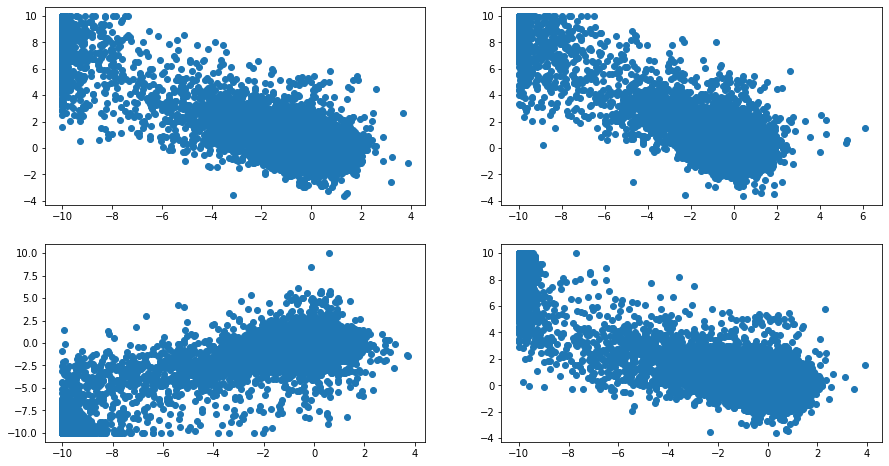

In [49]:
# some correlated examples
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(train_feat["c-60"], train_feat["g-349"])
plt.subplot(2,2,2)
plt.scatter(train_feat["c-31"], train_feat["g-349"])
plt.subplot(2,2,3)
plt.scatter(train_feat["c-38"], train_feat["g-228"])
plt.subplot(2,2,4)
plt.scatter(train_feat["c-6"], train_feat["g-349"])

# target info

In [50]:
target_feats = [i for i in train_score.columns if i != "sig_id"]
for i in target_feats:
    print(i, end=", ")

5-alpha_reductase_inhibitor, 11-beta-hsd1_inhibitor, acat_inhibitor, acetylcholine_receptor_agonist, acetylcholine_receptor_antagonist, acetylcholinesterase_inhibitor, adenosine_receptor_agonist, adenosine_receptor_antagonist, adenylyl_cyclase_activator, adrenergic_receptor_agonist, adrenergic_receptor_antagonist, akt_inhibitor, aldehyde_dehydrogenase_inhibitor, alk_inhibitor, ampk_activator, analgesic, androgen_receptor_agonist, androgen_receptor_antagonist, anesthetic_-_local, angiogenesis_inhibitor, angiotensin_receptor_antagonist, anti-inflammatory, antiarrhythmic, antibiotic, anticonvulsant, antifungal, antihistamine, antimalarial, antioxidant, antiprotozoal, antiviral, apoptosis_stimulant, aromatase_inhibitor, atm_kinase_inhibitor, atp-sensitive_potassium_channel_antagonist, atp_synthase_inhibitor, atpase_inhibitor, atr_kinase_inhibitor, aurora_kinase_inhibitor, autotaxin_inhibitor, bacterial_30s_ribosomal_subunit_inhibitor, bacterial_50s_ribosomal_subunit_inhibitor, bacterial_an

## per column

In [51]:
target_dists = pd.DataFrame(np.sum(train_score[target_feats])).reset_index(drop=False)
target_dists.columns = ["target", "number"]
target_dists.sort_values("number", ascending=False).reset_index(drop=True)

target  number
0                                nfkb_inhibitor     832
1                          proteasome_inhibitor     726
2                      cyclooxygenase_inhibitor     435
3                  dopamine_receptor_antagonist     424
4                 serotonin_receptor_antagonist     404
..                                          ...     ...
201                          elastase_inhibitor       6
202                                     steroid       6
203                        atm_kinase_inhibitor       6
204                             erbb2_inhibitor       1
205  atp-sensitive_potassium_channel_antagonist       1

[206 rows x 2 columns]

In [52]:
target_dists["number"].describe() # ターゲットラベルとしてあるのに、一回も観測されていないターゲットはない

count    206.000000
mean      81.766990
std      115.160351
min        1.000000
25%       19.000000
50%       38.500000
75%       83.000000
max      832.000000
Name: number, dtype: float64

<BarContainer object of 206 artists>

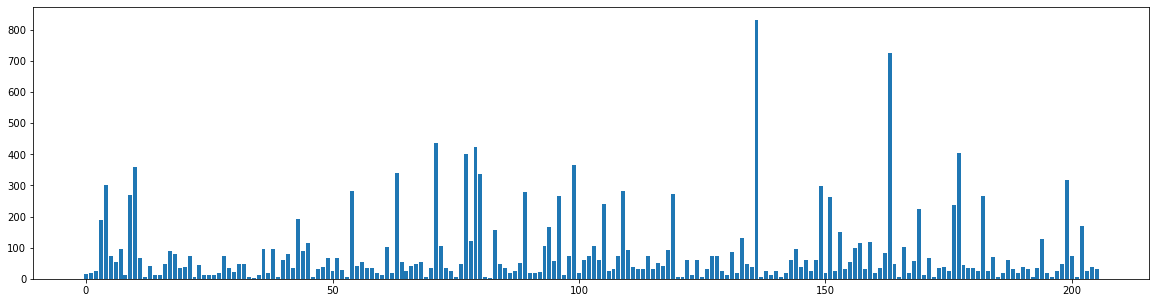

In [53]:
# prediction difficult differs per target 
plt.figure(figsize=(20,5))
plt.bar(range(target_dists.shape[0]), target_dists["number"])

## per row

16844
1    12532
0     9367
2     1538
3      303
4       55
5       13
7        6
Name: number, dtype: int64


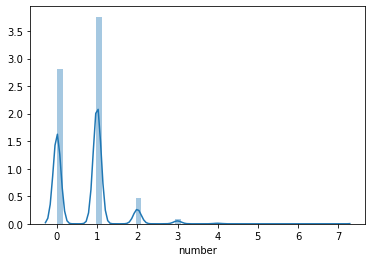

In [54]:
target_dists_per_id = pd.DataFrame(np.sum(train_score[target_feats], axis=1))
target_dists_per_id.columns = ["number"]
print(target_dists_per_id["number"].sum())
print(target_dists_per_id["number"].value_counts())
sns.distplot(target_dists_per_id["number"])

In [55]:
# positive label rate = 0.3%
target_dists_per_id["number"].sum() * 100 / (len(target_feats) * train_feat.shape[0])

0.34335680814337

## correlations in target variables

In [56]:
correlations = train_score[target_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(20)

level_0                            level_1  \
42210                     fgfr_inhibitor                    vegfr_inhibitor   
42211                    vegfr_inhibitor                     fgfr_inhibitor   
42212  norepinephrine_reuptake_inhibitor       serotonin_reuptake_inhibitor   
42213       serotonin_reuptake_inhibitor  norepinephrine_reuptake_inhibitor   
42214                 insulin_sensitizer              ppar_receptor_agonist   
42215              ppar_receptor_agonist                 insulin_sensitizer   
42216                  caspase_activator                apoptosis_stimulant   
42217                apoptosis_stimulant                  caspase_activator   
42218  nitric_oxide_production_inhibitor                     nrf2_activator   
42219                     nrf2_activator  nitric_oxide_production_inhibitor   
42220                       trpv_agonist   aldehyde_dehydrogenase_inhibitor   
42221   aldehyde_dehydrogenase_inhibitor                       trpv_agonist   
42222                    pdgfr_inhibitor                     flt3_inhibitor   
42223                     flt3_inhibitor                    pdgfr_inhibitor   
42224                      kit_inhibitor                     flt3_inhibitor   
42225                     flt3_inhibitor                      kit_inhibitor   
42226                    pdgfr_inhibitor                      kit_inhibitor   
42227                      kit_inhibitor                    pdgfr_inhibitor   
42228                     nfkb_inhibitor               proteasome_inhibitor   
42229               proteasome_inhibitor                     nfkb_inhibitor   

              0  
42210  0.333914  
42211  0.333914  
42212  0.341511  
42213  0.341511  
42214  0.402977  
42215  0.402977  
42216  0.403381  
42217  0.403381  
42218  0.407888  
42219  0.407888  
42220  0.528950  
42221  0.528950  
42222  0.705119  
42223  0.705119  
42224  0.758112  
42225  0.758112  
42226  0.915603  
42227  0.915603  
42228  0.921340  
42229  0.921340

# auxiliary training data

In [57]:
cons_feats = [i for i in train_nonscore.columns if i != "sig_id"]

In [58]:
train_nonscore.shape

(23814, 403)

In [59]:
train_nonscore.head()

sig_id  abc_transporter_expression_enhancer  abl_inhibitor  \
0  id_000644bb2                                    0              0   
1  id_000779bfc                                    0              0   
2  id_000a6266a                                    0              0   
3  id_0015fd391                                    0              0   
4  id_001626bd3                                    0              0   

   ace_inhibitor  acetylcholine_release_enhancer  \
0              0                               0   
1              0                               0   
2              0                               0   
3              0                               0   
4              0                               0   

   adenosine_deaminase_inhibitor  adenosine_kinase_inhibitor  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   adenylyl_cyclase_inhibitor  age_inhibitor  alcohol_dehydrogenase_inhibitor  \
0                           0              0                                0   
1                           0              0                                0   
2                           0              0                                0   
3                           0              0                                0   
4                           0              0                                0   

   aldehyde_dehydrogenase_activator  aldose_reductase_inhibitor  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   alpha_mannosidase_inhibitor  ampk_inhibitor  \
0                            0               0   
1                            0               0   
2                            0               0   
3                            0               0   
4                            0               0   

   androgen_biosynthesis_inhibitor  angiotensin_receptor_agonist  antacid  \
0                                0                             0        0   
1                                0                             0        0   
2                                0                             0        0   
3                                0                             0        0   
4                                0                             0        0   

   anthelmintic  antihypertensive  antimetabolite  antipruritic  \
0             0                 0               0             0   
1             0                 0               0             0   
2             0                 0               0             0   
3             0                 0               0             0   
4             0                 0               0             0   

   antirheumatic_drug  antiseptic  antispasmodic  antithyroid_agent  \
0                   0           0              0                  0   
1                   0           0              0                  0   
2                   0           0              0                  0   
3                   0           0              0                  0   
4                   0           0              0                  0   

   antitussive  anxiolytic  ap_inhibitor  apolipoprotein_expression_enhancer  \
0            0           0             0                                   0   
1            0           0             0                                   0   
2            0           0             0                                   0   
3            0           0             0                                   0   


In [60]:
set(train_nonscore.sig_id.unique()) == set(train_score.sig_id.unique()) # idは完全一致

True

In [61]:
set(train_score.columns) & set(train_nonscore.columns) # id以外の変数はscore.csvとnon-score.csvで異なる

{'sig_id'}

In [62]:
train_nonscore.describe()

abc_transporter_expression_enhancer  abl_inhibitor  ace_inhibitor  \
count                         23814.000000   23814.000000   23814.000000   
mean                              0.000252       0.001008       0.003821   
std                               0.015871       0.031731       0.061700   
min                               0.000000       0.000000       0.000000   
25%                               0.000000       0.000000       0.000000   
50%                               0.000000       0.000000       0.000000   
75%                               0.000000       0.000000       0.000000   
max                               1.000000       1.000000       1.000000   

       acetylcholine_release_enhancer  adenosine_deaminase_inhibitor  \
count                    23814.000000                        23814.0   
mean                         0.000252                            0.0   
std                          0.015871                            0.0   
min                          0.000000                            0.0   
25%                          0.000000                            0.0   
50%                          0.000000                            0.0   
75%                          0.000000                            0.0   
max                          1.000000                            0.0   

       adenosine_kinase_inhibitor  adenylyl_cyclase_inhibitor  age_inhibitor  \
count                23814.000000                23814.000000   23814.000000   
mean                     0.000084                    0.000252       0.000504   
std                      0.009164                    0.015871       0.022443   
min                      0.000000                    0.000000       0.000000   
25%                      0.000000                    0.000000       0.000000   
50%                      0.000000                    0.000000       0.000000   
75%                      0.000000                    0.000000       0.000000   
max                      1.000000                    1.000000       1.000000   

       alcohol_dehydrogenase_inhibitor  aldehyde_dehydrogenase_activator  \
count                     23814.000000                      23814.000000   
mean                          0.000504                          0.000252   
std                           0.022443                          0.015871   
min                           0.000000                          0.000000   
25%                           0.000000                          0.000000   
50%                           0.000000                          0.000000   
75%                           0.000000                          0.000000   
max                           1.000000                          1.000000   

       aldose_reductase_inhibitor  alpha_mannosidase_inhibitor  \
count                23814.000000                      23814.0   
mean                     0.000756                          0.0   
std                      0.027483                          0.0   
min                      0.000000                          0.0   
25%                      0.000000                          0.0   
50%                      0.000000                          0.0   
75%                      0.000000                          0.0   
max                      1.000000                          0.0   

       ampk_inhibitor  androgen_biosynthesis_inhibitor  \
count    23814.000000                     23814.000000   
mean         0.000252                         0.000252   
std          0.015871                         0.015871   
min          0.000000                         0.000000   
25%          0.000000                         0.000000   
50%          0.000000                         0.000000   
75%          0.000000                         0.000000   
max          1.000000                         1.000000   

       angiotensin_receptor_agonist       antacid  anthelmintic  \
count                  23814.000000  23814.000000  23814.000000   
mean           

## per column

In [63]:
nontarget_dists = pd.DataFrame(np.sum(train_nonscore[cons_feats])).reset_index(drop=False)
nontarget_dists.columns = ["target", "number"]
nontarget_dists.sort_values("number", ascending=False).reset_index(drop=True)

target  number
0                     ace_inhibitor      91
1    purinergic_receptor_antagonist      78
2              map_kinase_inhibitor      74
3      sterol_demethylase_inhibitor      72
4         bone_resorption_inhibitor      67
..                              ...     ...
397                   src_activator       0
398    cysteine_peptidase_inhibitor       0
399  noradrenaline_uptake_inhibitor       0
400    cell_proliferation_inhibitor       0
401               ntpdase_inhibitor       0

[402 rows x 2 columns]

In [64]:
nontarget_dists.describe()

number
count  402.000000
mean    12.457711
std     13.359389
min      0.000000
25%      6.000000
50%      7.000000
75%     18.000000
max     91.000000

## per row

5008
0    19224
1     4282
2      247
3       36
4       13
7        6
5        6
Name: number, dtype: int64


(array([1.9224e+04, 4.2820e+03, 2.4700e+02, 0.0000e+00, 3.6000e+01,
        1.3000e+01, 0.0000e+00, 6.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

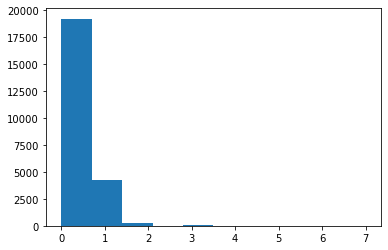

In [65]:
nontarget_dists_per_id = pd.DataFrame(np.sum(train_nonscore[cons_feats], axis=1))
nontarget_dists_per_id.columns = ["number"]
print(nontarget_dists_per_id["number"].sum())
print(nontarget_dists_per_id["number"].value_counts())
plt.hist(nontarget_dists_per_id["number"])

In [66]:
nontarget_dists_per_id["number"].sum() * 100 / (len(cons_feats) * train_nonscore.shape[0])

0.05231255329968115

# combined training data

In [67]:
train = pd.merge(train_feat, train_score, on="sig_id")
print(train.shape)

(23814, 1084)


In [68]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11    g-12  \
0 -0.1944 -1.0120 -1.0220 -0.0326  0.5548 -0.0921  1.1830  0.1530  0.5574   
1  1.0190  0.5207  0.2341  0.3372 -0.4047  0.8507 -1.1520 -0.4201 -0.0958   
2 -0.0323  1.2390  0.1715  0.2155  0.0065  1.2300 -0.4797 -0.5631 -0.0366   
3  4.0620 -0.8095 -1.9590  0.1792 -0.1321 -1.0600 -0.8269 -0.3584 -0.8511   
4  1.4180 -0.8244 -0.2800 -0.1498 -0.8789  0.8630 -0.2219 -0.5121 -0.9577   

     g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20    g-21  \
0 -0.4015  0.1789 -0.6528 -0.7969  0.6342  0.1778 -0.3694 -0.5688 -1.1360   
1  0.4590  0.0803  0.2250  0.5293  0.2839 -0.3494  0.2883  0.9449 -0.1646   
2 -1.8300  0.6057 -0.3278  0.6042 -0.3075 -0.1147 -0.0570 -0.0799 -0.8181   
3 -0.5844 -2.5690  0.8183 -0.0532 -0.8554  0.1160 -2.3520  2.1200 -1.1580   
4  1.1750  0.2042  0.1970  0.1244 -1.7090 -0.3543 -0.5160 -0.3330 -0.2685   

     g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29    g-30  \
0 -1.1880  0.6940  0.4393  0.2664  0.1907  0.1628 -0.2853  0.5819  0.2934   
1 -0.2657 -0.3372  0.3135 -0.4316  0.4773  0.2075 -0.4216 -0.1161 -0.0499   
2 -1.5320  0.2307  0.4901  0.4780 -1.3970  4.6240 -0.0437  1.2870 -1.8530   
3 -0.7191 -0.8004 -1.4670 -0.0107 -0.8995  0.2406 -0.2479 -1.0890 -0.7575   
4  0.7649  0.2057  1.3720  0.6835  0.8056 -0.3754 -1.2090  0.2965 -0.0712   

     g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38    g-39  \
0 -0.5584 -0.0916 -0.3010 -0.1537  0.2198  0.2965 -0.5055 -0.5119 -0.2162   
1 -0.2627  0.9959 -0.2483  0.2655 -0.2102  0.1656  0.5300 -0.2568 -0.0455   
2  0.6069  0.4290  0.1783  0.0018 -1.1800  0.1256 -0.1219  5.4470  1.0310   
3  0.0881 -2.7370  0.8745  0.5787 -1.6740 -1.6720 -1.2690  3.0900 -0.3814   
4  0.6389  0.6674 -0.0783  1.1740 -0.7110 -1.4470  1.0620  0.7888 -0.0848   

     g-40    g-41    g-42    g-43    g-44    g-45    g-46    g-47    g-48  \
0 -0.0347 -0.2566 -1.1980  0.3116 -1.0330  0.2208 -0.1143 -0.0251  0.0350   
1  0.1194 -0.3958 -1.1730  0.4509  1.9250  1.1010  0.2648 -0.3615  0.1710   
2  0.3477 -0.5561  0.0357 -0.3636 -0.4653 -0.8346  0.1113 -0.7615 -0.4983   
3 -0.7229 -0.0010  0.1353 -1.6400 -0.7483 -1.0820 -0.1521  0.0747 -0.4851   
4  0.1302  0.1224  0.9584  0.2126  0.6162  1.1570  1.1140 -0.9416 -0.3780   

     g-49    g-50    g-51    g-52    g-53    g-54    g-55    g-56    g-57  \
0  0.4233 -0.1221 -0.4927  0.6119  0.4715 -0.0351 -0.1605 -0.6750  0.2263   
1 -0.8900  1.2730 -0.5036 -0.2277 -0.7339 -0.4283 -0.1231 -0.6328  0.4759   
2  0.4552 -0.0978 -0.2661  0.6058  0.2686 -0.6191 -0.4444  1.2540  0.0621   
3  0.6636 -2.8230 -0.6035 -1.3550  2.0200 -0.5301 -1.3240 -0.5936  0.4331   
4 -0.8147 -0.0803 -0.3818  0.6877  0.0000  0.1776  1.1320 -0.1180  1.2130   

     g-58    g-59    g-60    g-61    g-62    g-63    g-64    g-65    g-66  \
0  0.5790  0.9588  0.6061 -0.1300  0.6611 -0.3136 -0.2020  0.0251  0.1670   
1  0.3249 -0.7408 -0.5814  1.7840 -0.1087  1.0350  0.4087 -0.6948 -0.8026   
2 -0.1757 -1.4370  0.5553  0.8346 -0.3334 -0.2933 -0.1644 -1.1280 -0.0292   
3  0.0899 -1.5240  0.3936  1.4630 -1.2100 -1.2340 -1.0300  0.7977  0.2314   
4  0.7709  0.6745  0.7871  1.6410  0.1806  1.3480  1.1070  0.5392  0.0000   

     g-67    g-68    g-69    g-70    g-71    g-72    g-73    g-74    g-75  \
0 -0.4195  0.6551 -0.7395 -0.7047 -0.5369  0.0314 -0.5239 -0.3406 -0.6332   
1  0.0954 -0.4054  0.1197  0.1956  0.0720 -0.2463 -0.1084  0.4008 -0.5857   
2  0.0939  0.5916  0.6809  0.7821  0.6801  0.9634  0.4057 -0.0708 -1.3570   
3  

In [69]:
# it's confirmed that control perturbations have no MoAs
train[train.cp_type=="ctl_vehicle"][target_feats].sum().sum()

0

In [70]:
train_cp = train[train.cp_type=="trt_cp"].copy().reset_index(drop=True)

In [71]:
correlations = train_cp[target_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(20)

level_0                            level_1  \
42210                    vegfr_inhibitor                     fgfr_inhibitor   
42211                     fgfr_inhibitor                    vegfr_inhibitor   
42212  norepinephrine_reuptake_inhibitor       serotonin_reuptake_inhibitor   
42213       serotonin_reuptake_inhibitor  norepinephrine_reuptake_inhibitor   
42214                 insulin_sensitizer              ppar_receptor_agonist   
42215              ppar_receptor_agonist                 insulin_sensitizer   
42216                  caspase_activator                apoptosis_stimulant   
42217                apoptosis_stimulant                  caspase_activator   
42218  nitric_oxide_production_inhibitor                     nrf2_activator   
42219                     nrf2_activator  nitric_oxide_production_inhibitor   
42220   aldehyde_dehydrogenase_inhibitor                       trpv_agonist   
42221                       trpv_agonist   aldehyde_dehydrogenase_inhibitor   
42222                     flt3_inhibitor                    pdgfr_inhibitor   
42223                    pdgfr_inhibitor                     flt3_inhibitor   
42224                      kit_inhibitor                     flt3_inhibitor   
42225                     flt3_inhibitor                      kit_inhibitor   
42226                      kit_inhibitor                    pdgfr_inhibitor   
42227                    pdgfr_inhibitor                      kit_inhibitor   
42228               proteasome_inhibitor                     nfkb_inhibitor   
42229                     nfkb_inhibitor               proteasome_inhibitor   

              0  
42210  0.333715  
42211  0.333715  
42212  0.341479  
42213  0.341479  
42214  0.402823  
42215  0.402823  
42216  0.403324  
42217  0.403324  
42218  0.407857  
42219  0.407857  
42220  0.528933  
42221  0.528933  
42222  0.704812  
42223  0.704812  
42224  0.757870  
42225  0.757870  
42226  0.915517  
42227  0.915517  
42228  0.921120  
42229  0.921120

In [72]:
correlations = train_cp[g_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(20)

level_0 level_1         0
595192    g-37   g-672  0.833165
595193   g-672    g-37  0.833165
595194   g-121   g-672  0.837354
595195   g-672   g-121  0.837354
595196   g-195    g-63  0.838530
595197    g-63   g-195  0.838530
595198   g-744   g-123  0.839280
595199   g-123   g-744  0.839280
595200   g-369   g-569  0.841484
595201   g-569   g-369  0.841484
595202   g-460   g-349  0.845178
595203   g-349   g-460  0.845178
595204    g-50   g-489  0.847806
595205   g-489    g-50  0.847806
595206   g-489    g-37  0.850502
595207    g-37   g-489  0.850502
595208    g-50   g-672  0.851694
595209   g-672    g-50  0.851694
595210    g-50    g-37  0.912383
595211    g-37    g-50  0.912383

In [73]:
correlations = train_cp[c_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(20)

level_0 level_1         0
9880    c-94    c-13  0.915666
9881    c-13    c-94  0.915666
9882    c-42     c-4  0.917120
9883     c-4    c-42  0.917120
9884    c-38    c-94  0.917296
9885    c-94    c-38  0.917296
9886    c-38    c-63  0.917566
9887    c-63    c-38  0.917566
9888    c-52     c-4  0.917748
9889     c-4    c-52  0.917748
9890    c-33     c-6  0.917805
9891     c-6    c-33  0.917805
9892    c-55    c-11  0.917963
9893    c-11    c-55  0.917963
9894    c-26    c-13  0.924001
9895    c-13    c-26  0.924001
9896    c-73    c-13  0.924338
9897    c-13    c-73  0.924338
9898    c-42    c-52  0.927873
9899    c-52    c-42  0.927873

In [74]:
# target variables vs explanation variables
all_feats = [i for i in train_cp.columns if i != "sig_id"]
correlations = train_cp[all_feats].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'].isin(target_feats)]
correlations = correlations[~correlations['level_1'].isin(target_feats)].reset_index(drop=True)
correlations.tail(20)

level_0 level_1         0
180230        nfkb_inhibitor    c-78  0.763313
180231  proteasome_inhibitor    c-14  0.767815
180232  proteasome_inhibitor    c-68  0.770052
180233  proteasome_inhibitor    c-27  0.772269
180234  proteasome_inhibitor    c-61  0.772351
180235  proteasome_inhibitor    c-72  0.772406
180236  proteasome_inhibitor    c-90  0.774141
180237  proteasome_inhibitor    c-17  0.778975
180238  proteasome_inhibitor    c-93  0.780356
180239  proteasome_inhibitor    c-35  0.782141
180240  proteasome_inhibitor    c-44  0.782305
180241  proteasome_inhibitor    c-88  0.783706
180242  proteasome_inhibitor    c-85  0.784811
180243  proteasome_inhibitor    c-83  0.787470
180244  proteasome_inhibitor    c-16  0.789159
180245  proteasome_inhibitor   g-349  0.789331
180246  proteasome_inhibitor    c-31  0.798461
180247  proteasome_inhibitor    c-53  0.798831
180248  proteasome_inhibitor    c-32  0.804192
180249  proteasome_inhibitor    c-78  0.819816

In [75]:
correlations.head(20)

level_0 level_1             0
0                  beta_amyloid_inhibitor   g-217  3.928972e-08
1                          acat_inhibitor   g-255  1.142334e-07
2         benzodiazepine_receptor_agonist   g-481  3.948857e-07
3                  beta_amyloid_inhibitor   g-345  4.094129e-07
4                           hcv_inhibitor   g-373  4.442083e-07
5                 cck_receptor_antagonist   g-253  4.911229e-07
6                           antihistamine    g-23  5.000695e-07
7                    insulin_secretagogue   g-251  5.217303e-07
8             potassium_channel_activator   g-649  5.558960e-07
9                               analgesic    c-58  5.720282e-07
10       progesterone_receptor_antagonist   g-765  5.808323e-07
11                    apoptosis_stimulant   g-536  7.234841e-07
12                              analgesic   g-383  7.659585e-07
13                          antihistamine   g-584  8.081027e-07
14                               diuretic    g-13  8.622598e-07
15  ubiquitin_specific_protease_inhibitor   g-455  9.422703e-07
16                         acat_inhibitor    g-87  1.010965e-06
17           serotonin_reuptake_inhibitor    g-85  1.249700e-06
18           cannabinoid_receptor_agonist   g-530  1.279710e-06
19                casein_kinase_inhibitor   g-554  1.326017e-06

# Summary

- clear correlation in some g-variables, but may be influenced by 10 or -10 values and others have no correlations
- almost all g variables have normal distribution with one peak, but some have second peak and sharp peak
- clear correlation in all c-variables, but may be influenced by minimum value of -10
- clear correlation in target-variables
- even after removing control pertubations data, correlations of g-variables, c-variables and target-variables remain
- only 0.3% of labels become 1 in the training data, so the data are skewed
- almost all exmaples have 0 or 1 positive labels
- some explanatory variables significantly effect target variables
- train_features.csv and train_targets_scored.csv can be connected via sig_id without data loss
- small difference in cp variables between training and test
- small difference in g variables between training and test
- small difference in c variables between training and test
- distribution of all c variables per person look simpler than cases in g-variables. values of g-variables may be clipped if they are larger than 10?
- correlations between c variables and g varibles are also high. 
- some patients have many identical values in g-variable and except an example with 392 unique values, others have at least 681 unique values.
- many identical values in g-variables mean that the exmaple include multiple values of -10 or 10.
- some patients have many identical values in c-variable and the identical values are -10 and they are all negative values.
- labels in auxiliary training data are also unbalanced.
- no missing values in the data
- in terms of interactions in cp variables, there's no significant characteristics.
- traingin data clearly include one outlier in terms of g unique values
- in terms of unique values, no differece between train and test

### question ###
- control pertubations have no Moas, then why are the data included in the training data?
- how can I utilize nonscore training data

## fe ideas
- dimensionality reducition towards g and c variables
- num of unique value in g and c variables
- include -10 or 10 ?
- remove control group
- under sampling with lightgbm
- num of positive values an negative values (from c variables)

# lightgbm baseline 

In [76]:
import lightgbm as lgb